<a href="https://colab.research.google.com/github/VictoriaPedrozaAI/Practical_project/blob/main/Breast_Cancer_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
#Libraries Data manipulation and analysis
import pandas as pd
import numpy as np

#Libraries visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Sklearn tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  mean_squared_error,classification_report,confusion_matrix, precision_score,accuracy_score,f1_score,recall_score,RocCurveDisplay
from sklearn import metrics
import plotly.express as px
from scipy.stats.mstats import winsorize


#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#warning
import warnings
warnings.filterwarnings ('ignore')


In [ ]:
#Link to the Dataset
df = pd.read_csv('https://raw.githubusercontent.com/abdelDebug/Breast-Cancer-Dataset/refs/heads/main/breast_cancer_dataset.csv')

# Exploratory analysis

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.shape

(569, 32)

In [ ]:
#Searching for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#finding missing values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
#Statistical summary
df.drop('id', axis=1, inplace=True)
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# Occurrences of each class
print("\nDistribution of the target variable:")
print(df['diagnosis'].value_counts())


Distribution of the target variable:
diagnosis
B    357
M    212
Name: count, dtype: int64


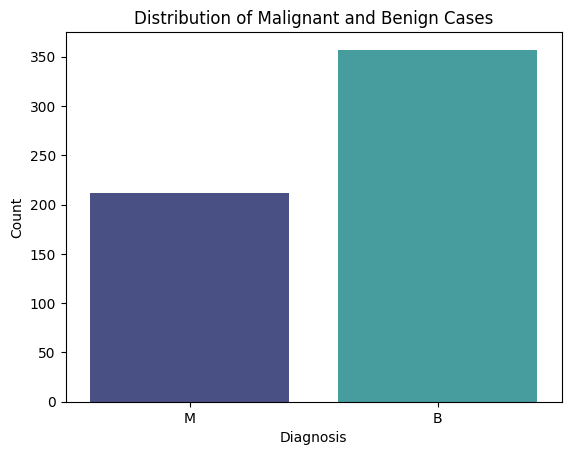

In [ ]:
# Visualization the distribution of each class
sns.countplot(x='diagnosis', data=df, palette='mako')
plt.title('Distribution of Malignant and Benign Cases')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

#Target variable

In [ ]:
# Target variable
y = df['diagnosis'].values
X = df.drop('diagnosis', axis=1)

#Split data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [ ]:
# checking the shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
#Subset of the data set with the target variable
M = df[df.diagnosis== "M"]
B = df[df.diagnosis == "B"]

# Boxplots to visualize and analaize data

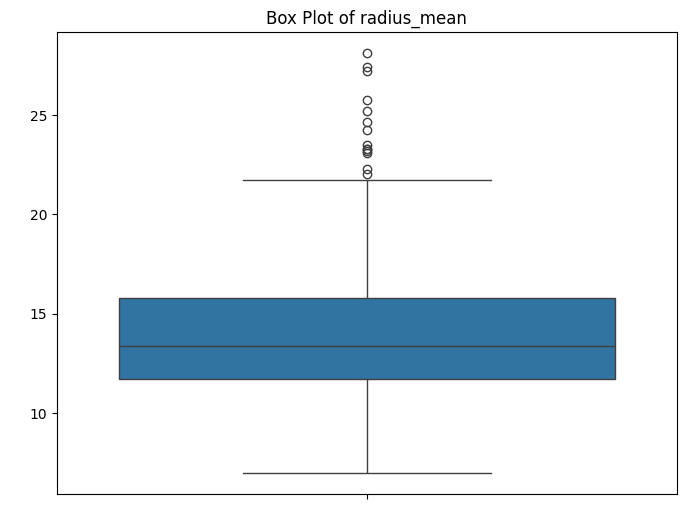

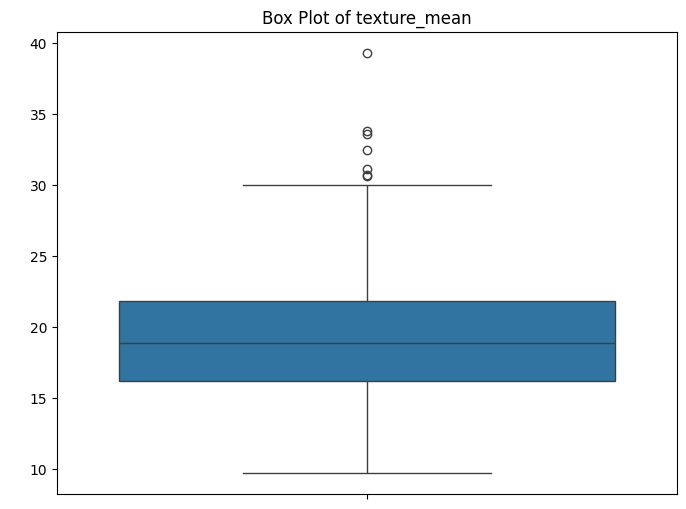

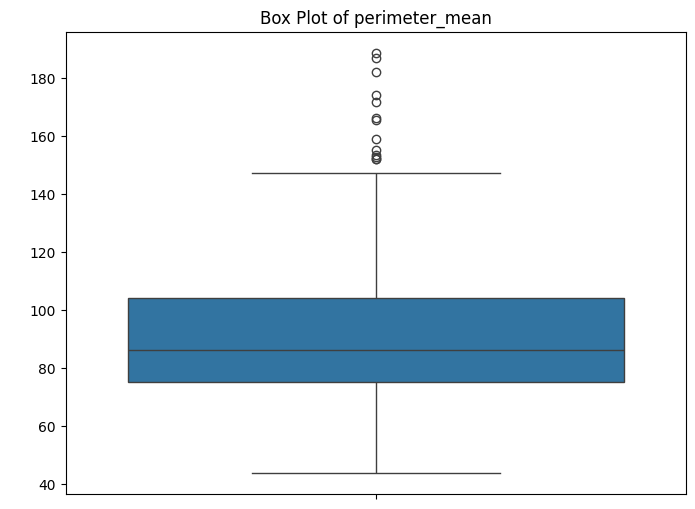

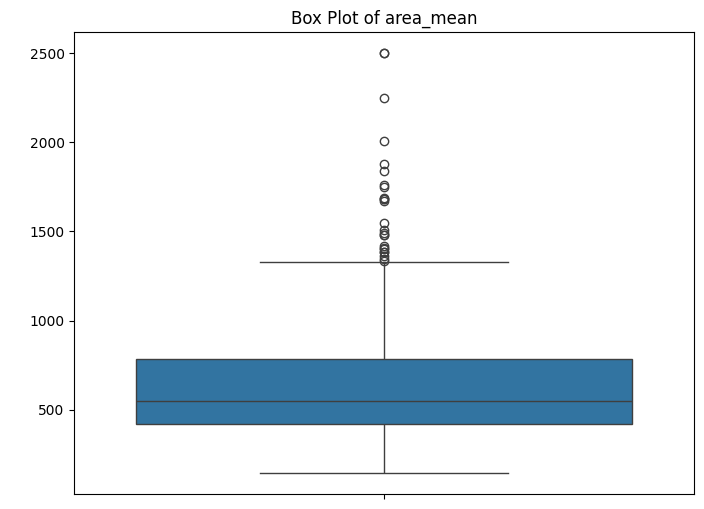

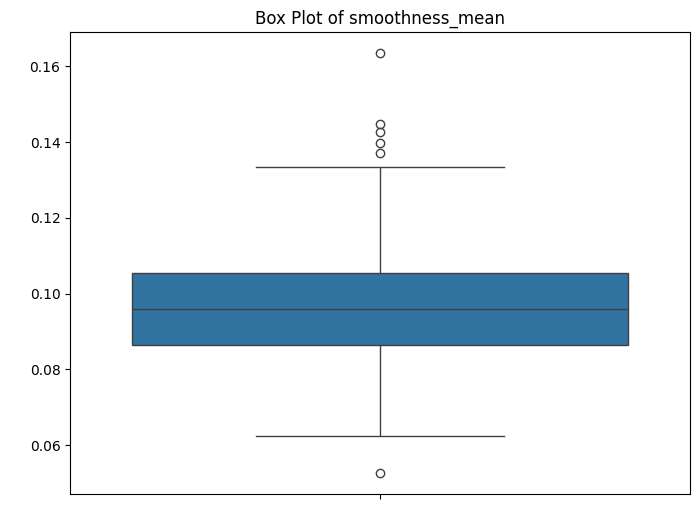

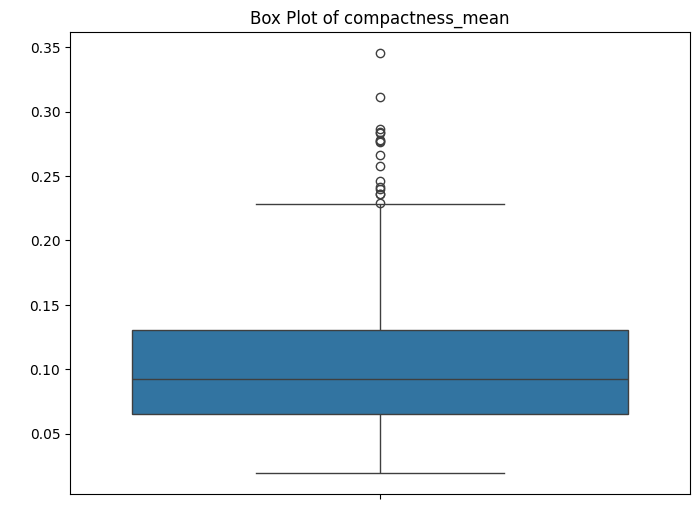

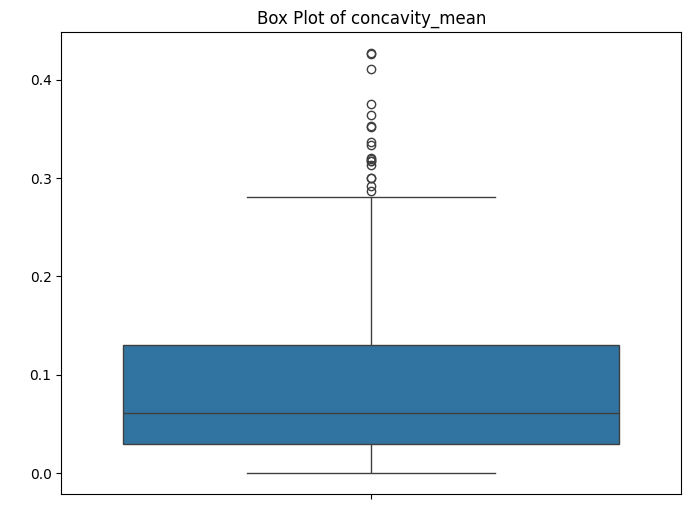

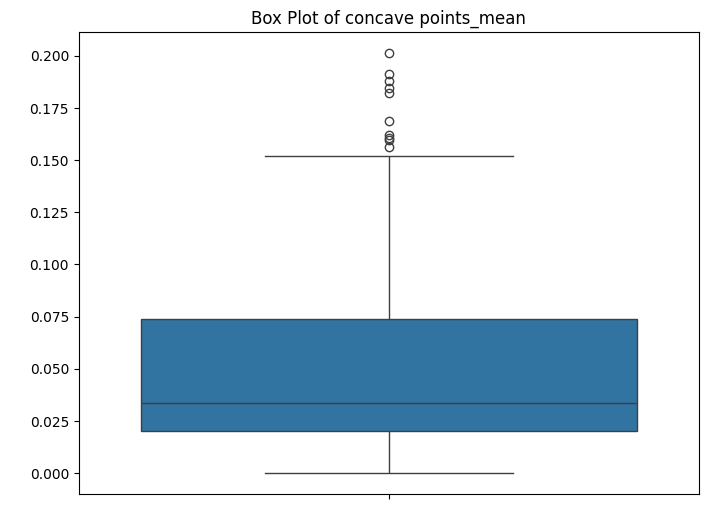

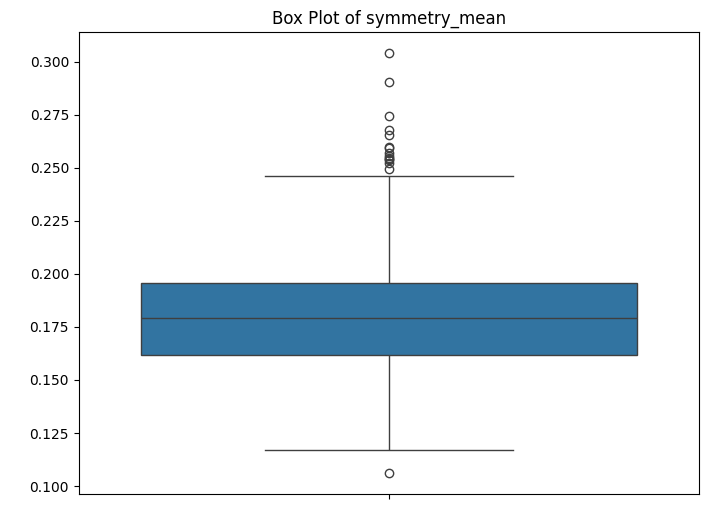

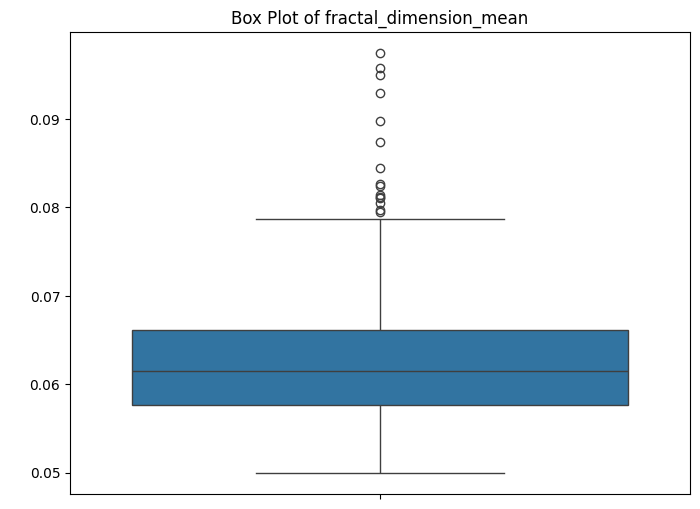

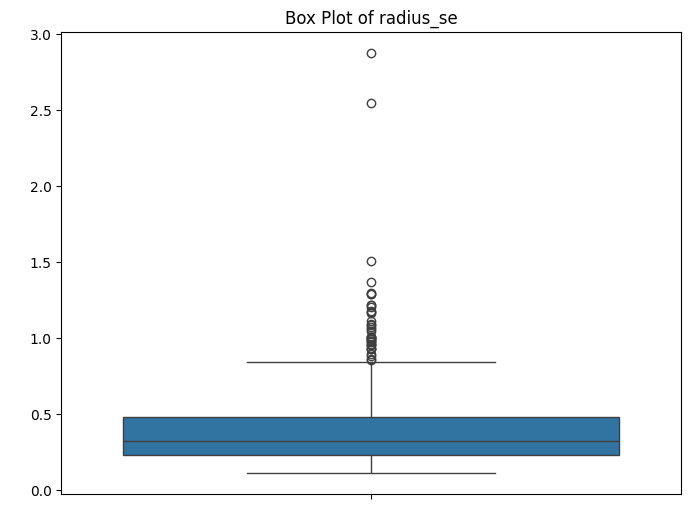

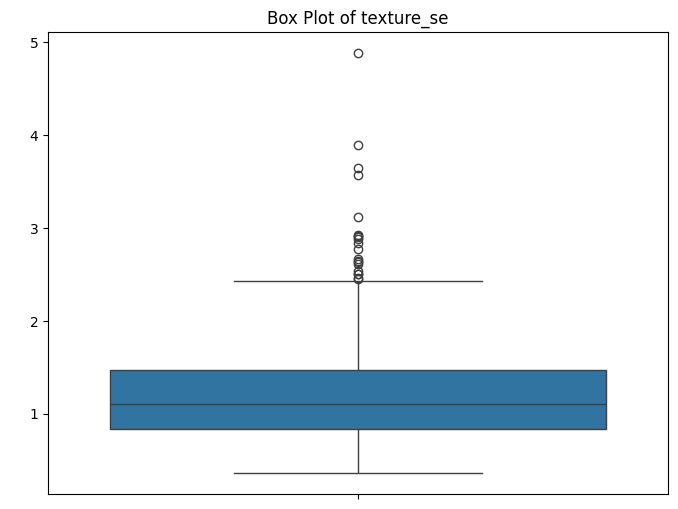

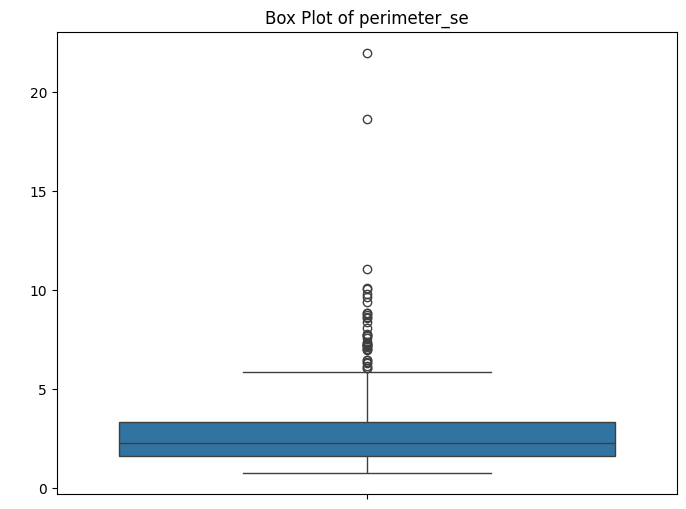

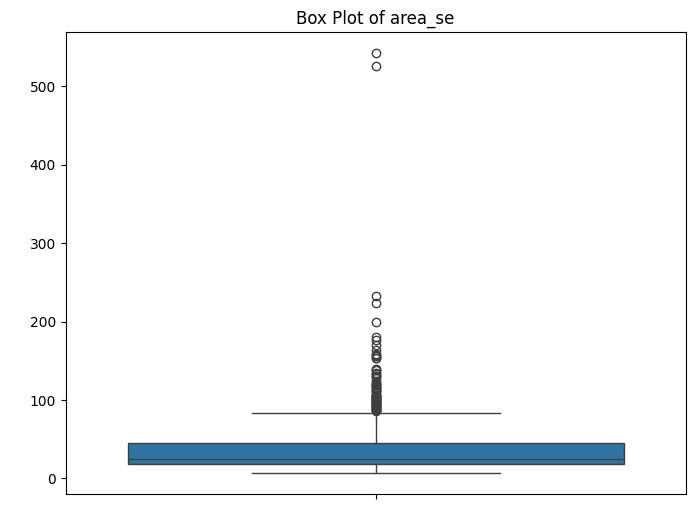

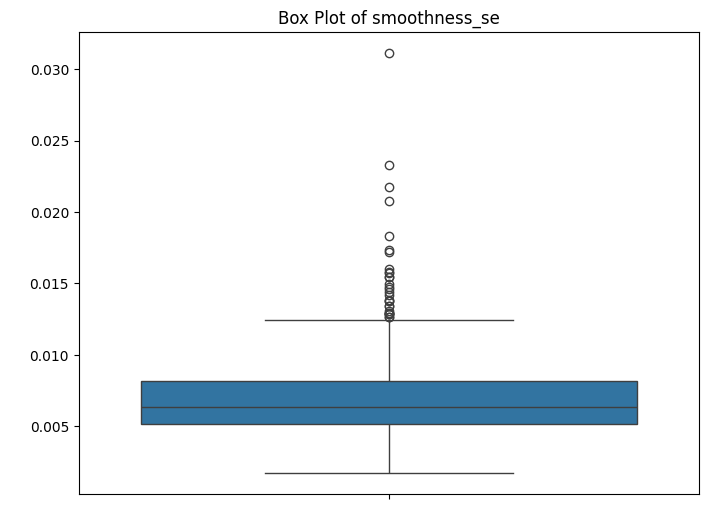

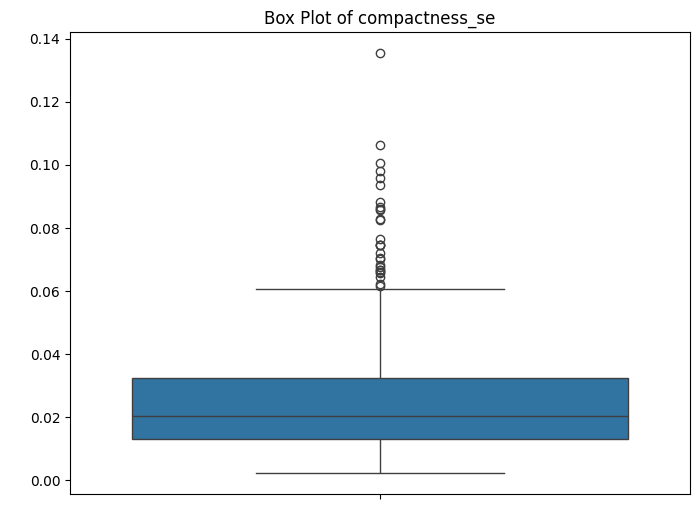

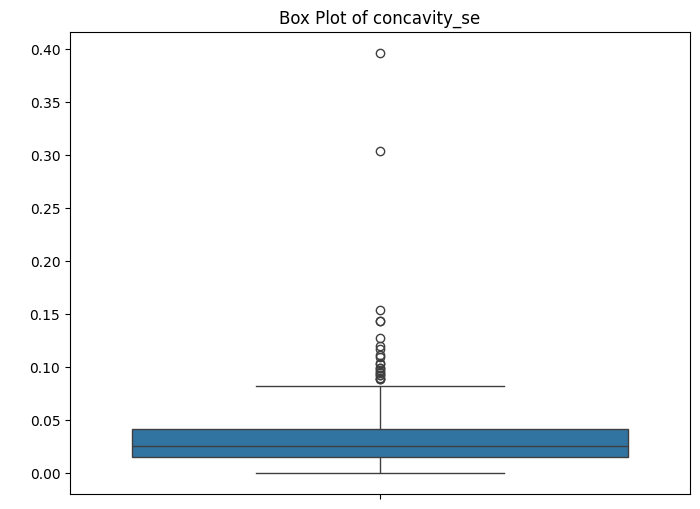

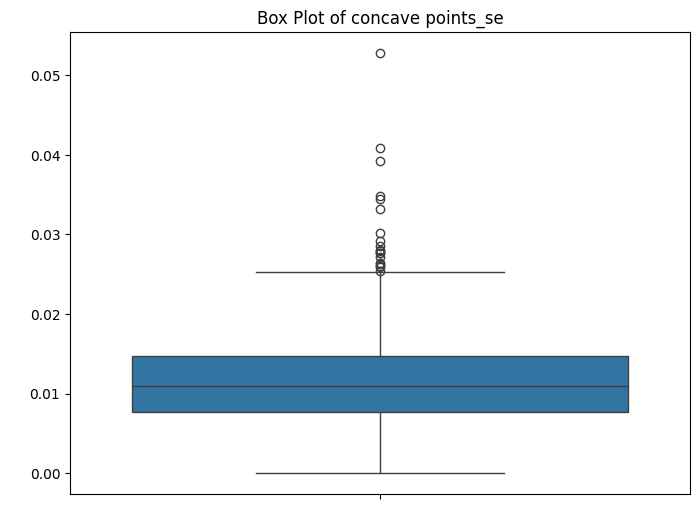

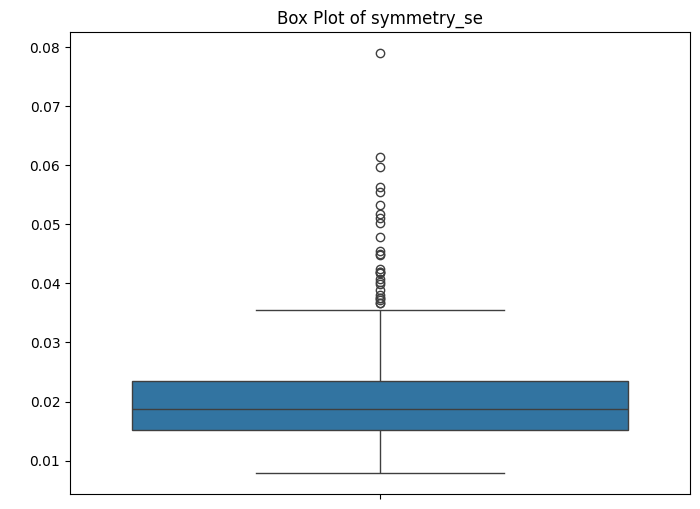

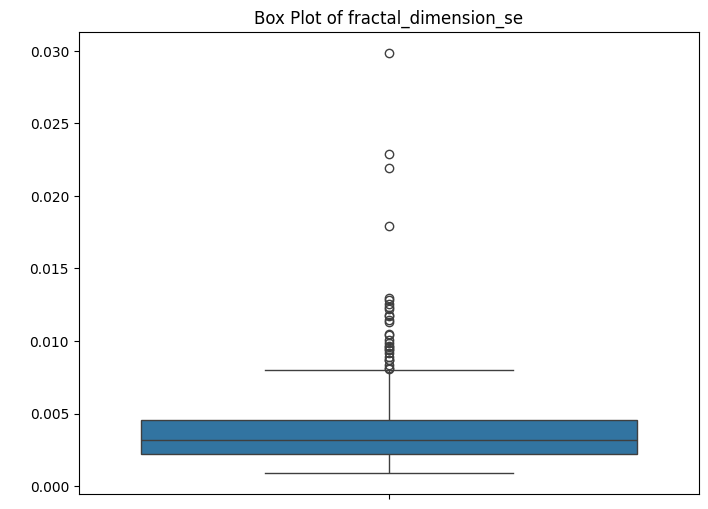

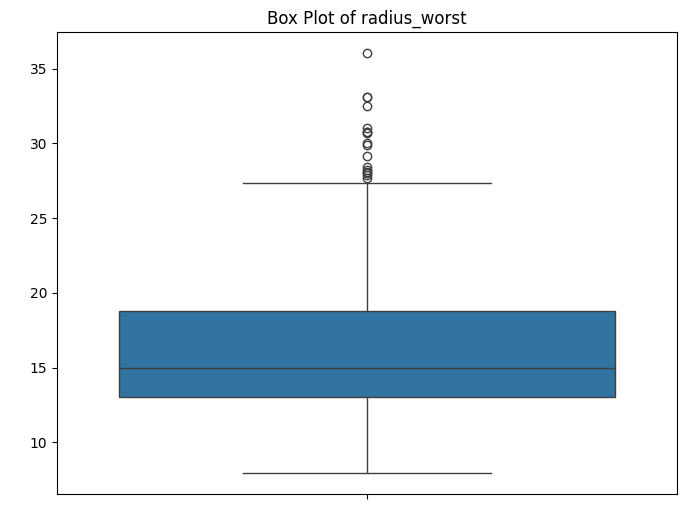

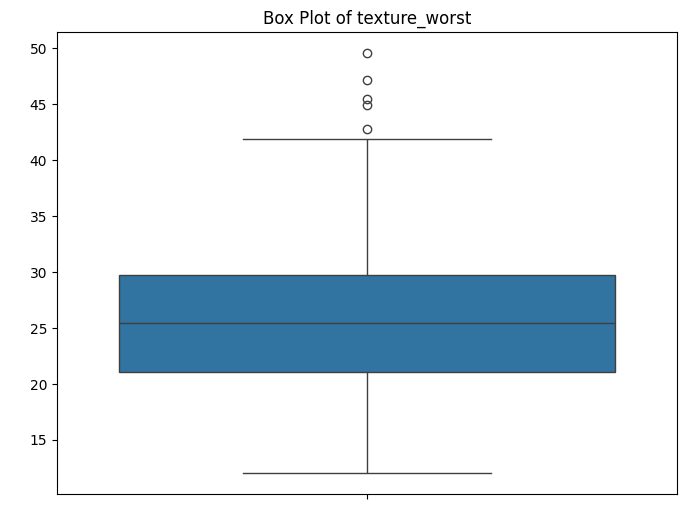

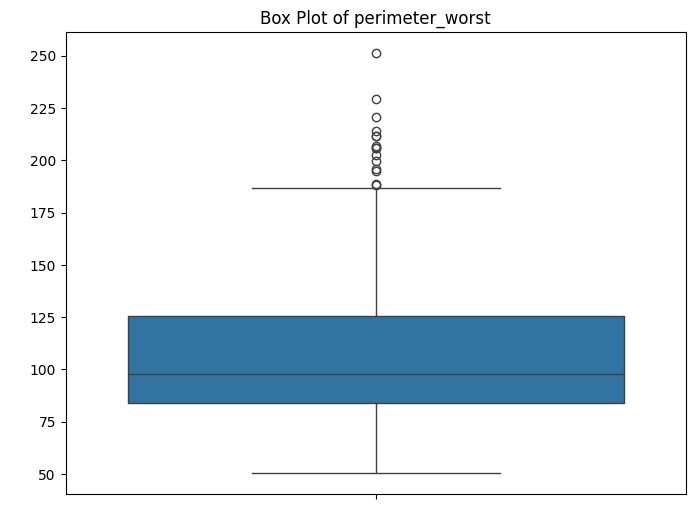

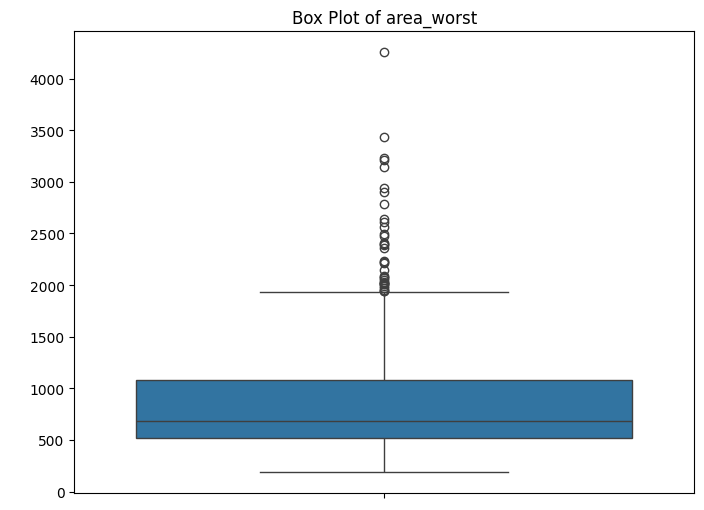

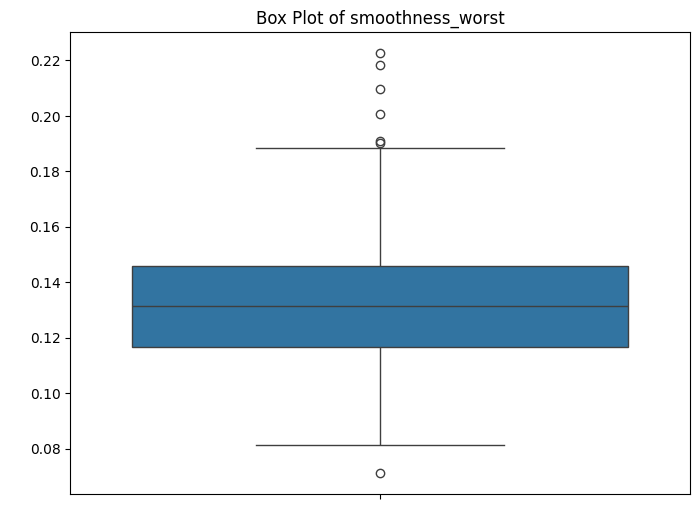

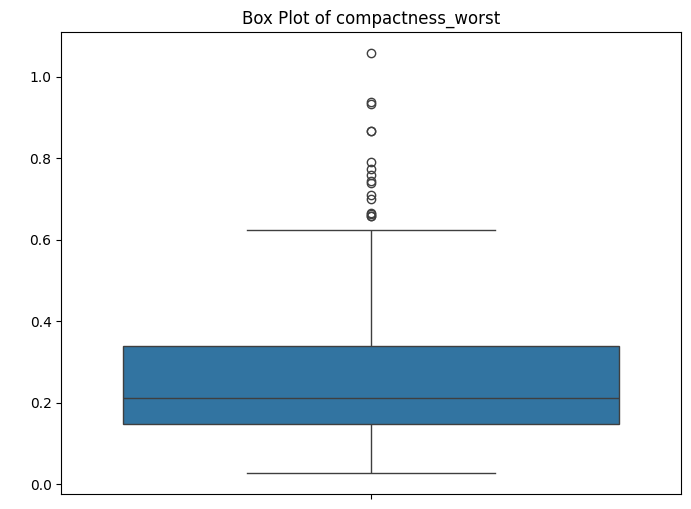

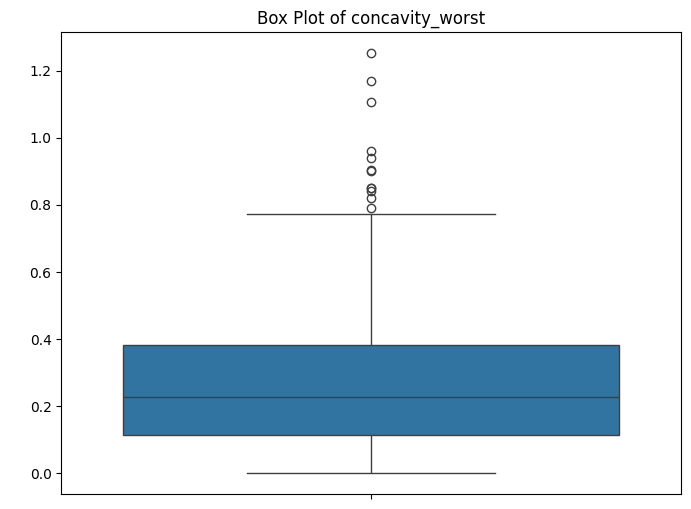

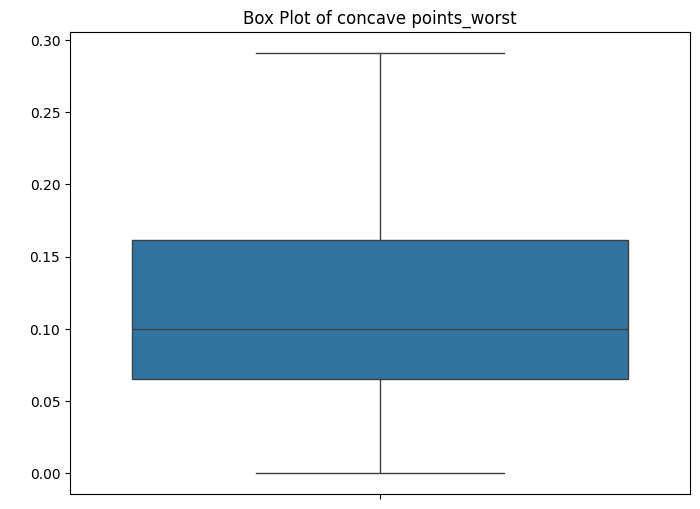

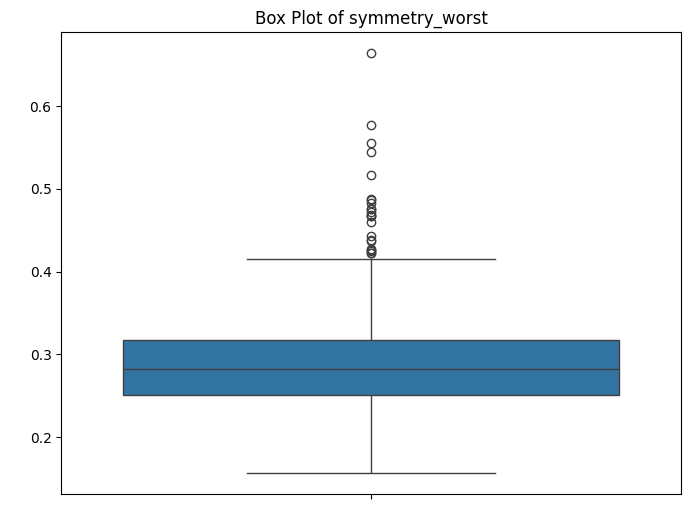

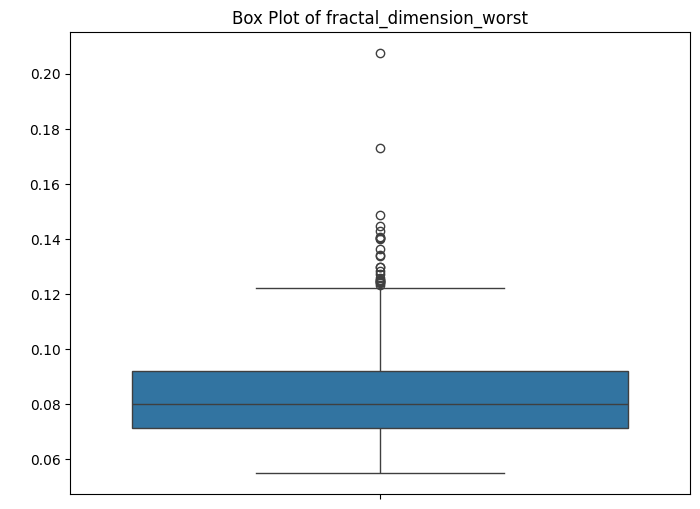

In [ ]:
columns_to_plot = df.drop('diagnosis', axis=1).columns

for col in columns_to_plot:

    plt.figure(figsize=(8, 6))
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(' ')
    plt.show()

#Remove the outliers with winsorization

In [ ]:
df_cap = X.copy()

In [ ]:
features_f=['concave points_mean','radius_mean','perimeter_mean', 'area_mean','radius_worst','perimeter_worst','area_worst', 'perimeter_se','radius_se','area_se','concave points_worst']

In [ ]:
def percentile_capping(df, cols, from_low_end, from_high_end):

    for col in cols:
      lower_bound = df[col].quantile(from_low_end)
      upper_bound = df[col].quantile(1-from_high_end)

      df[col] = np.where(df[col]>upper_bound, upper_bound,
      np.where(df[col]<lower_bound, lower_bound, df[col]))

      winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [ ]:
# 1%
percentile_capping (df_cap, features_f, 0.01, 0.01)

In [ ]:
df_cap.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.113362,19.289649,91.889771,651.295227,0.096360,0.104341,0.088799,0.048689,0.181162,0.062798,...,16.252581,25.677223,107.132718,876.073835,0.132369,0.254265,0.272188,0.114480,0.290076,0.083946
std,3.439789,4.301036,23.752853,334.962197,0.014064,0.052813,0.079720,0.038033,0.027414,0.007060,...,4.754601,6.146258,33.020473,548.004368,0.022832,0.157336,0.208624,0.065417,0.061867,0.018061
min,8.458360,9.710000,53.827600,215.664000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,9.207600,12.020000,58.270400,256.192000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,24.371600,39.280000,165.724000,1786.600000,0.163400,0.345400,0.426800,0.164208,0.304000,0.097440,...,30.762800,49.540000,208.304000,2918.160000,0.222600,1.058000,1.252000,0.269216,0.663800,0.207500


In [ ]:
# Scaling features
scaler = StandardScaler()
df_cap_ss_array = scaler.fit_transform(df_cap[features_f])
df_cap_ss = pd.DataFrame(df_cap_ss_array, columns=features_f)

In [ ]:
df_cap_ss.describe()

,concave points_mean,radius_mean,perimeter_mean,area_mean,radius_worst,perimeter_worst,area_worst,perimeter_se,radius_se,area_se,concave points_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.123881e-16,-4.995028e-17,-9.990056e-17,-2.934579e-16,-6.993039e-16,-3.996022e-16,1.498508e-16,9.990056e-17,6.243785e-17,-1.123881e-16,-2.622390e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-1.281314e+00,-1.645443e+00,-1.603835e+00,-1.301683e+00,-1.483022e+00,-1.481060e+00,-1.132158e+00,-1.063755e+00,-1.146021e+00,-8.757353e-01,-1.751537e+00
25%,-7.468339e-01,-7.022191e-01,-7.045252e-01,-6.902226e-01,-6.825881e-01,-6.978390e-01,-6.589204e-01,-6.929669e-01,-6.848371e-01,-6.064429e-01,-7.581139e-01
50%,-3.997245e-01,-2.162969e-01,-2.380658e-01,-2.993872e-01,-2.699931e-01,-2.871265e-01,-3.462393e-01,-3.061332e-01,-3.090456e-01,-4.137524e-01,-2.226169e-01
75%,6.660775e-01,4.849440e-01,5.145055e-01,3.926425e-01,5.341462e-01,5.536976e-01,3.797581e-01,3.016671e-01,3.242327e-01,1.822035e-01,7.178688e-01
max,3.040000e+00,2.984853e+00,3.111171e+00,3.392334e+00,3.054512e+00,3.066591e+00,3.729684e+00,3.899073e+00,3.649947e+00,4.004109e+00,2.367444e+00


In [ ]:
df_cap_ss.head()

,concave points_mean,radius_mean,perimeter_mean,area_mean,radius_worst,perimeter_worst,area_worst,perimeter_se,radius_se,area_se,concave points_worst
0,2.589784,1.127991,1.302472,1.044931,1.921392,2.348102,2.087450,3.273641,2.846293,3.303616,2.309060
1,0.565287,1.878697,1.728058,2.016044,1.839294,1.566081,1.972386,0.324957,0.588679,1.015561,1.094247
2,2.084515,1.622642,1.605860,1.648515,1.540373,1.375123,1.521264,0.999217,1.415993,1.591036,1.966342
3,1.487140,-0.783691,-0.602974,-0.792414,-0.282624,-0.250450,-0.563217,0.351654,0.392596,-0.335869,2.188191
4,1.463455,1.797225,1.820760,1.929391,1.323550,1.366029,1.276525,1.483754,1.463479,1.602863,0.734699


#Plots features before and after  winsorization

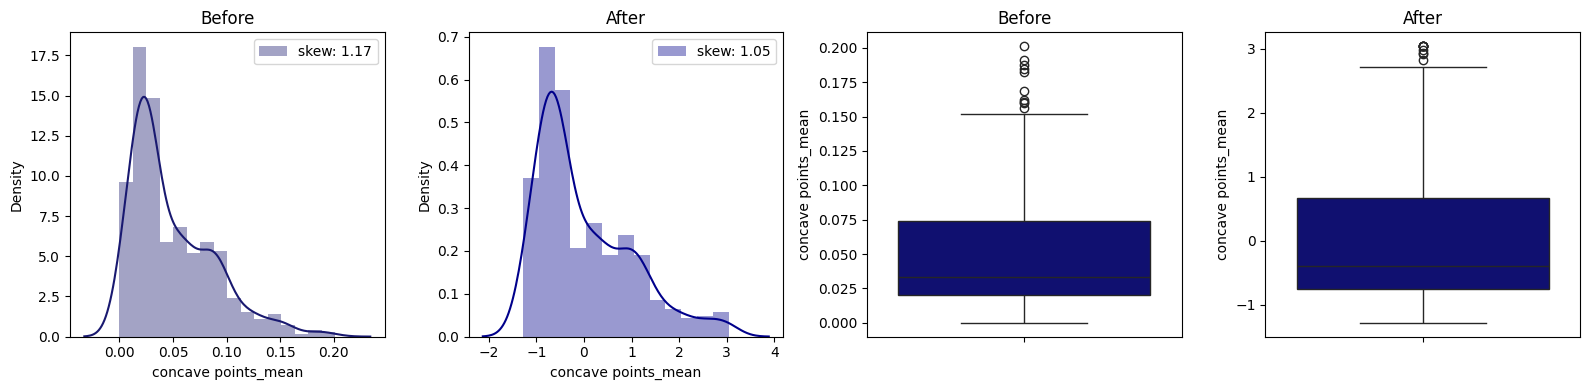

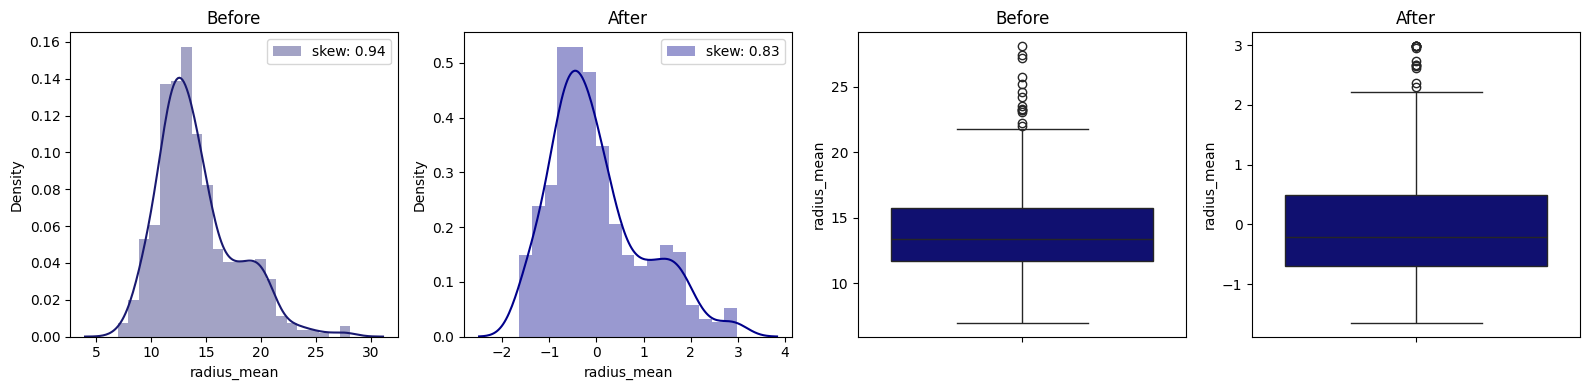

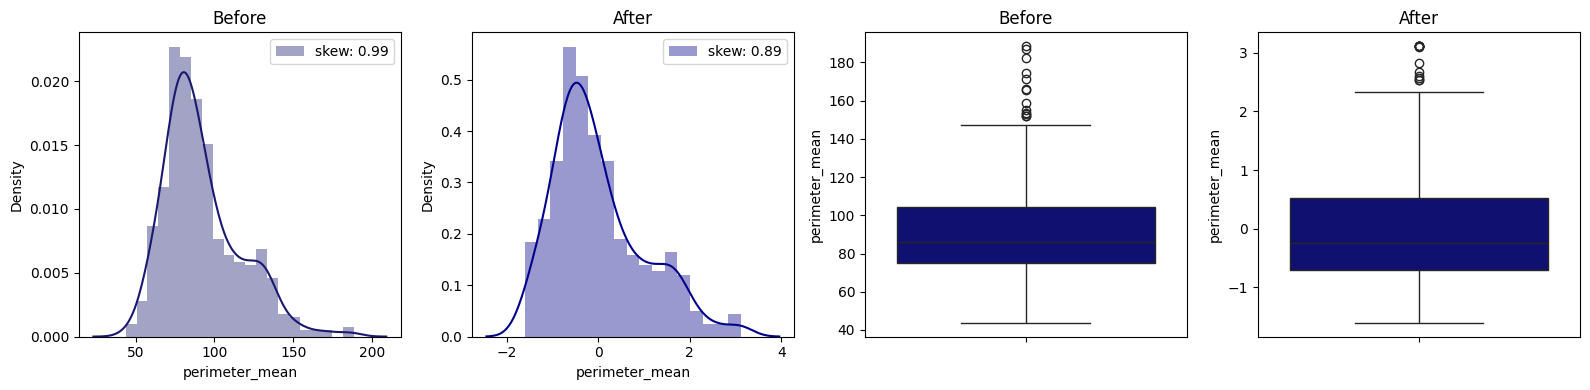

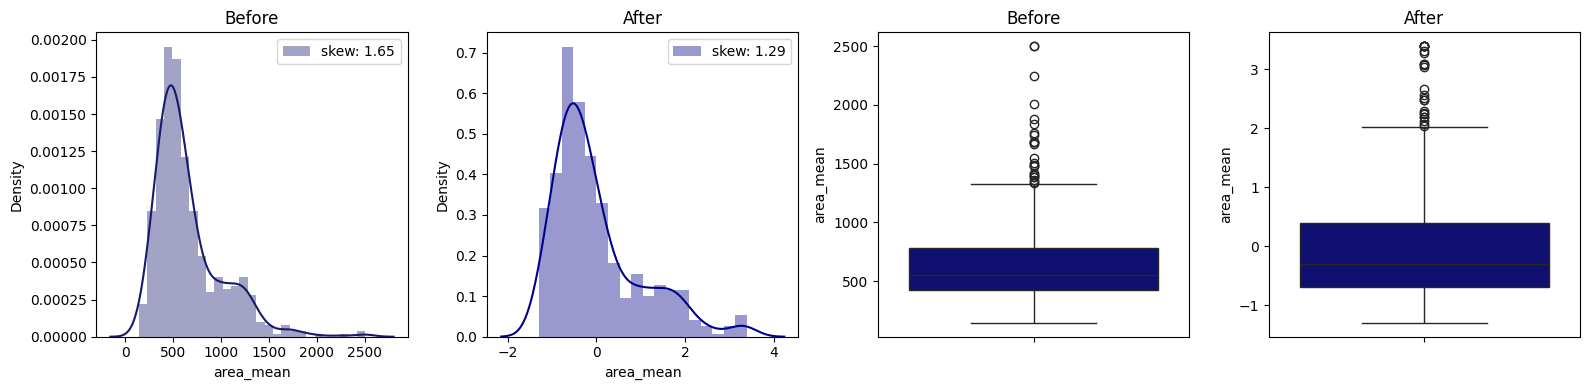

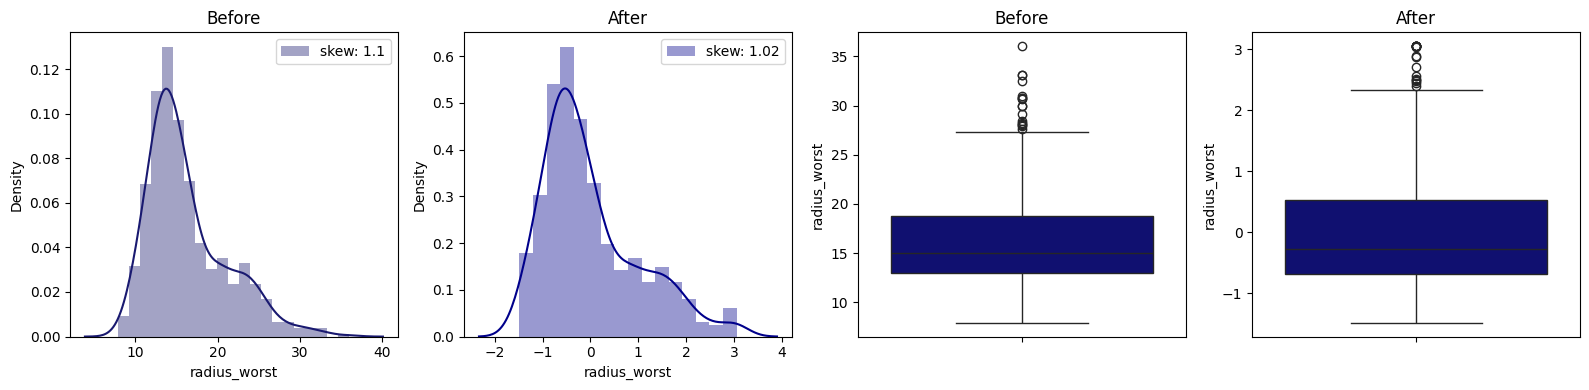

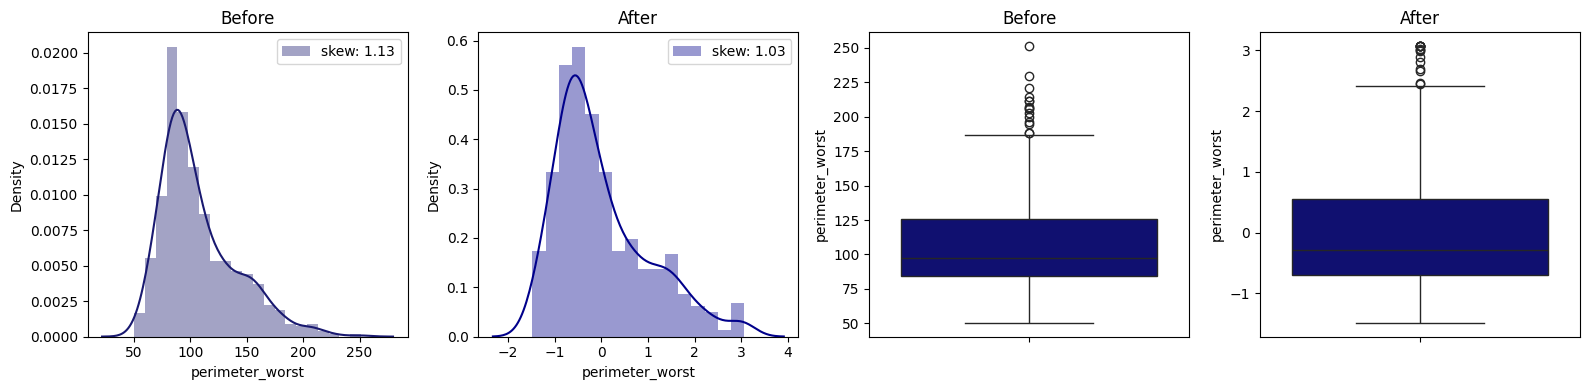

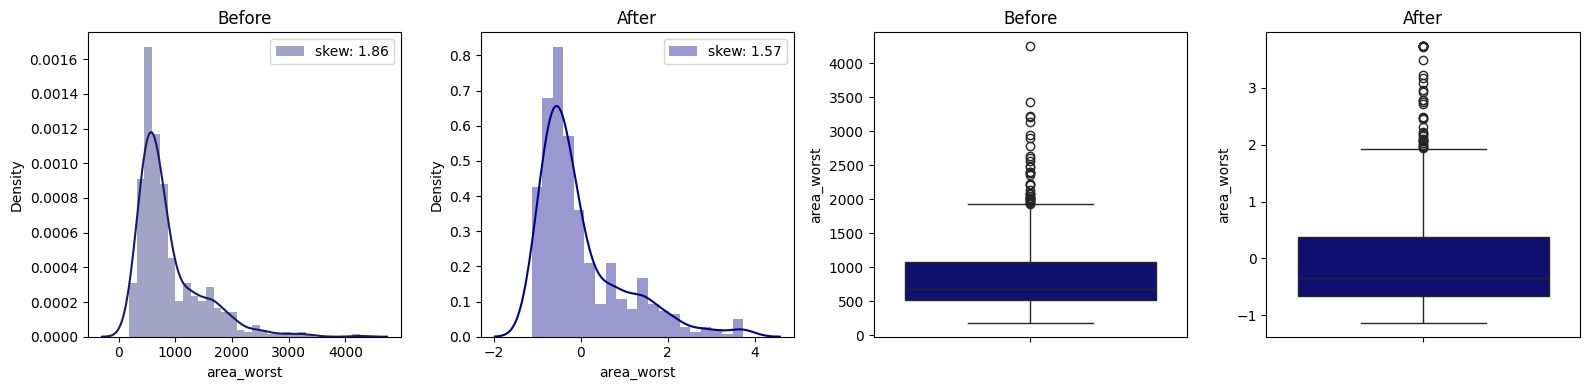

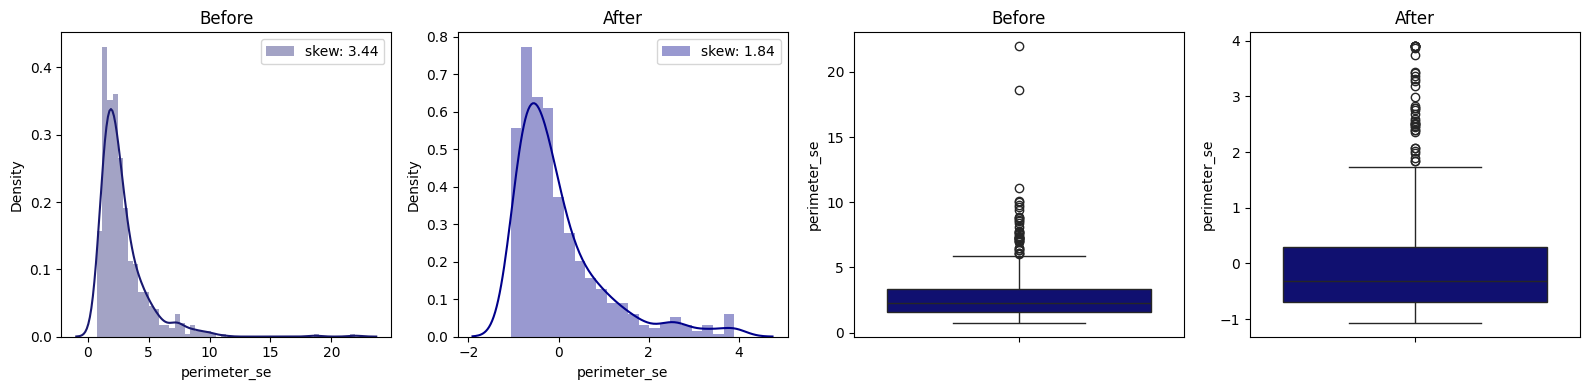

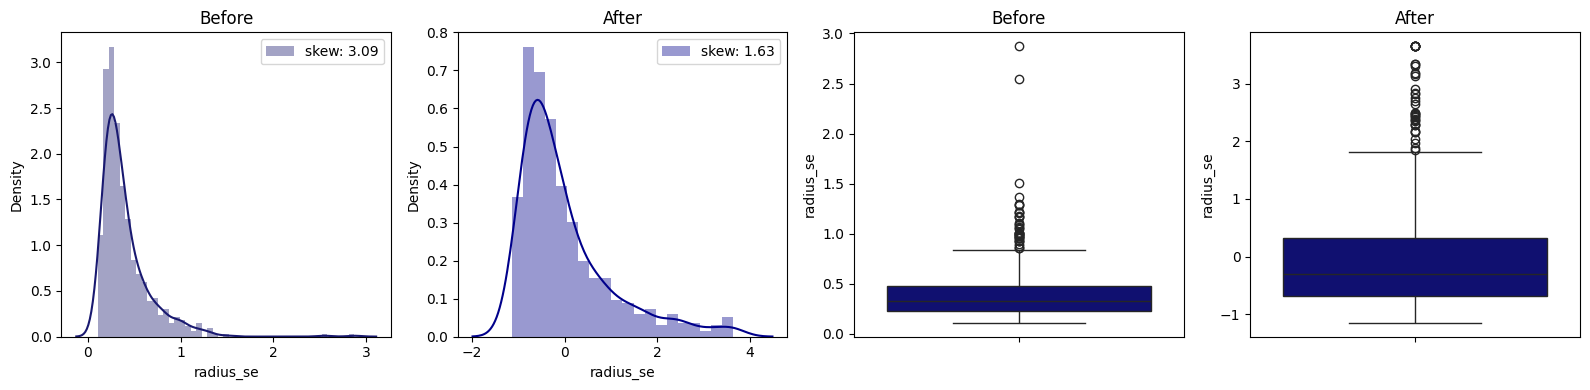

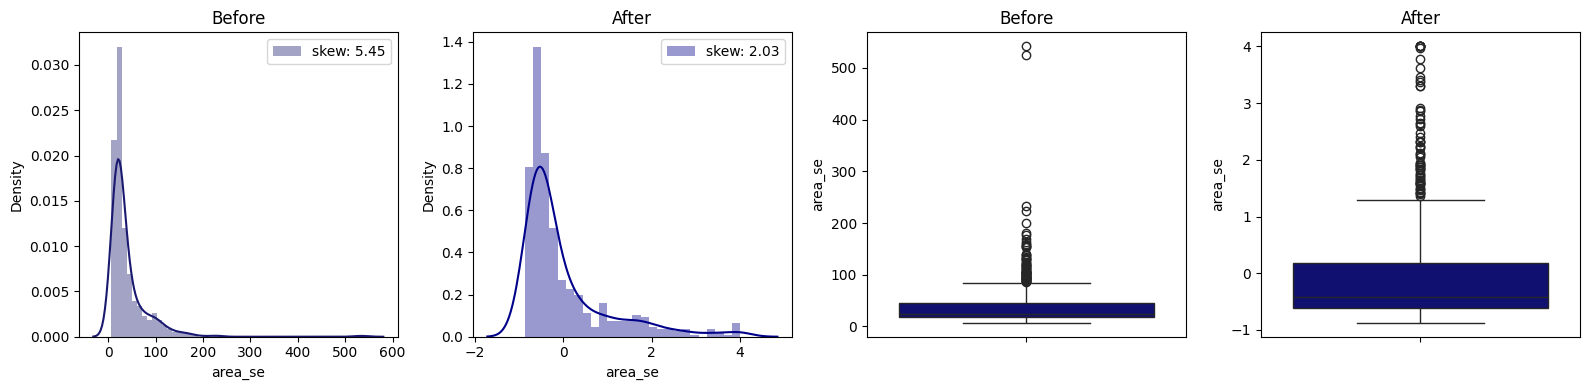

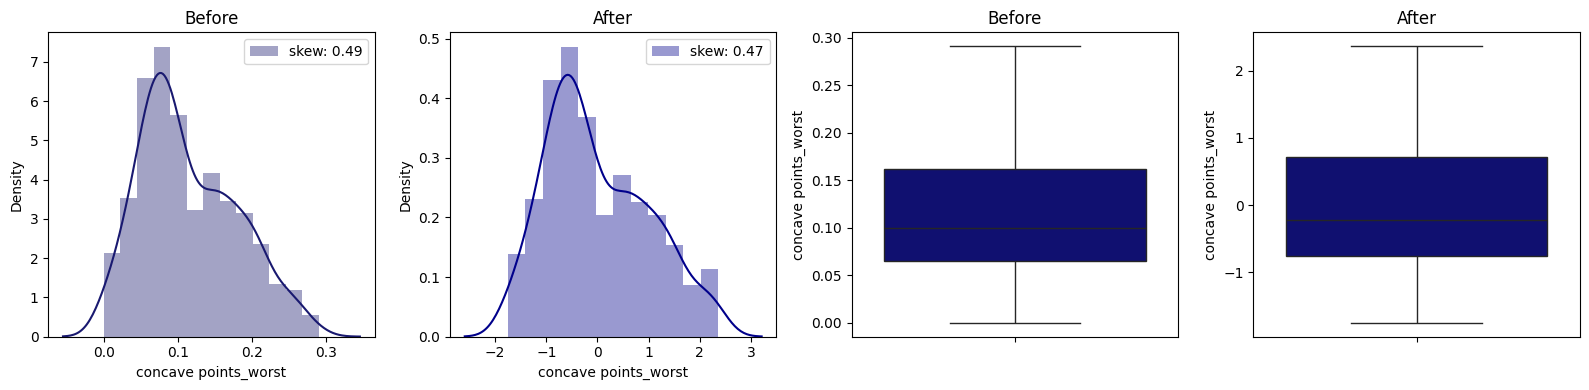

In [ ]:
for col in features_f:
    plt.figure(figsize=(16,4))

    plt.subplot(141)
    sns.distplot(df[col],color='midnightblue' ,label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()

    plt.subplot(142)
    sns.distplot(df_cap_ss[col],color='darkblue' ,label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()

    plt.subplot(143)
    sns.boxplot(df[col], color='navy')
    plt.title('Before')

    plt.subplot(144)
    sns.boxplot(df_cap_ss[col], color='navy')
    plt.title('After')
    plt.tight_layout()
    plt.show()

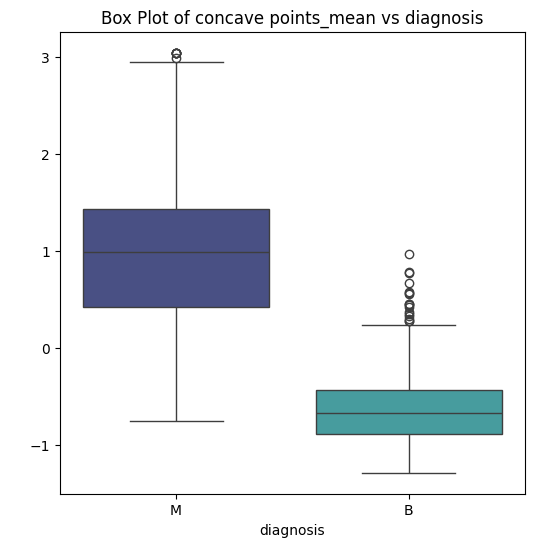

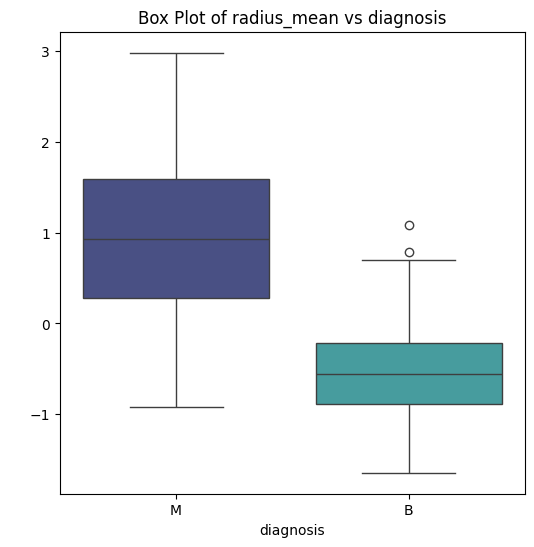

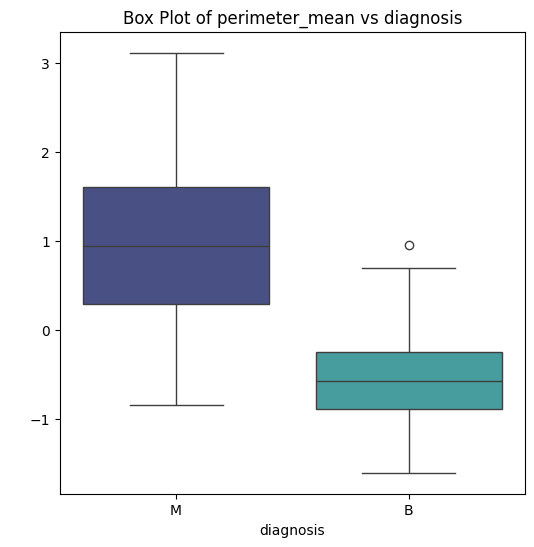

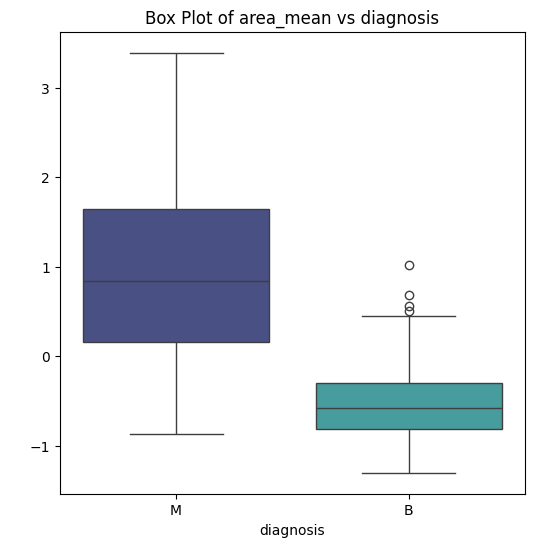

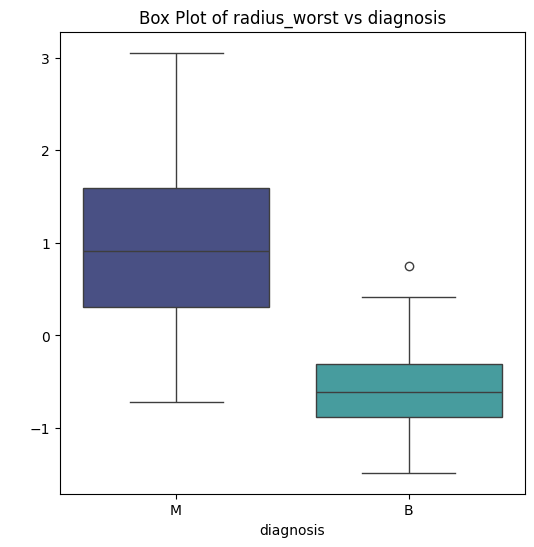

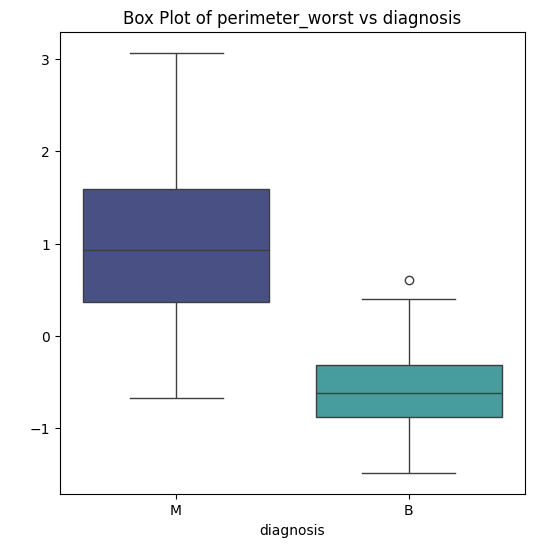

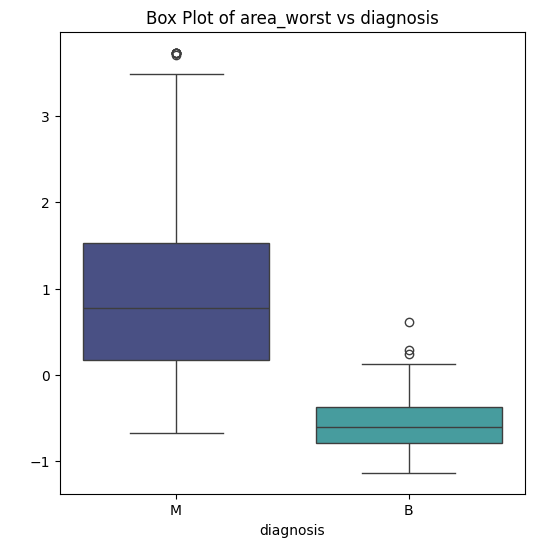

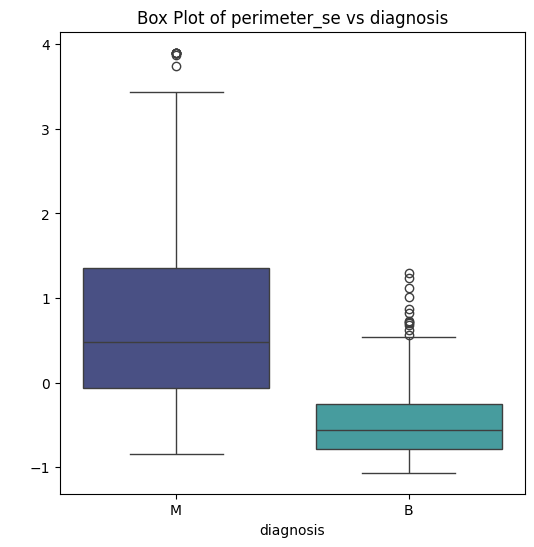

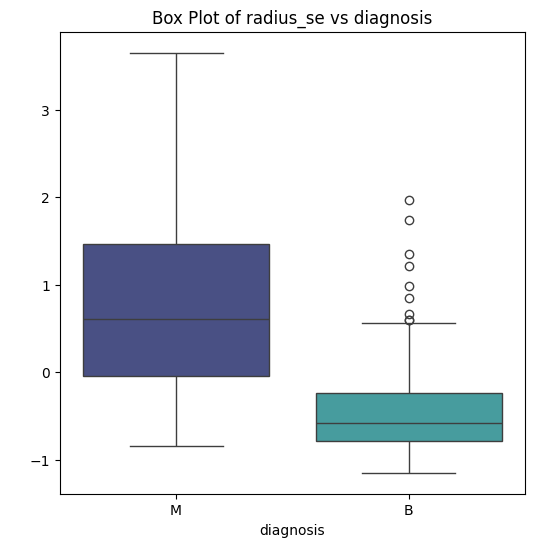

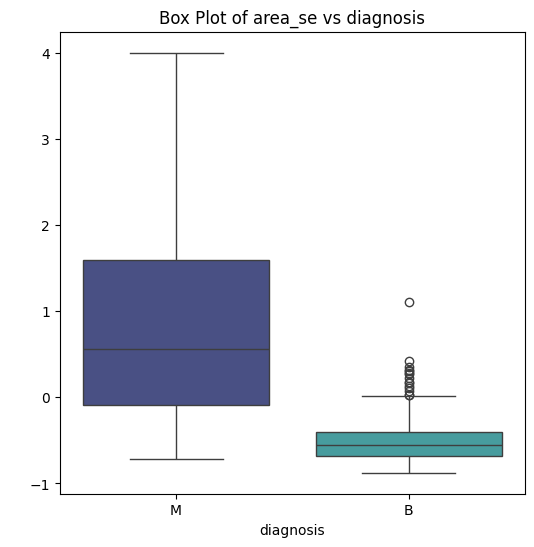

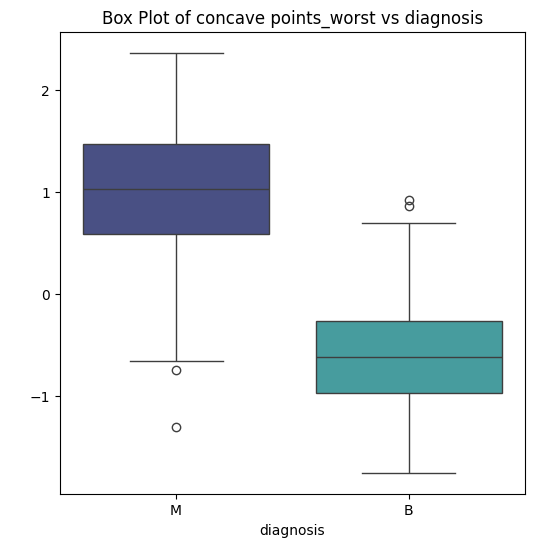

In [ ]:
columns_to_plot = features_f

for col in columns_to_plot:

    plt.figure(figsize=(6, 6))
    plot_data = df_cap_ss.copy()
    plot_data['diagnosis'] = y
    sns.boxplot(y=col, x='diagnosis', data=plot_data, palette='mako')
    plt.title(f'Box Plot of {col} vs diagnosis')
    plt.ylabel(' ')
    plt.show()

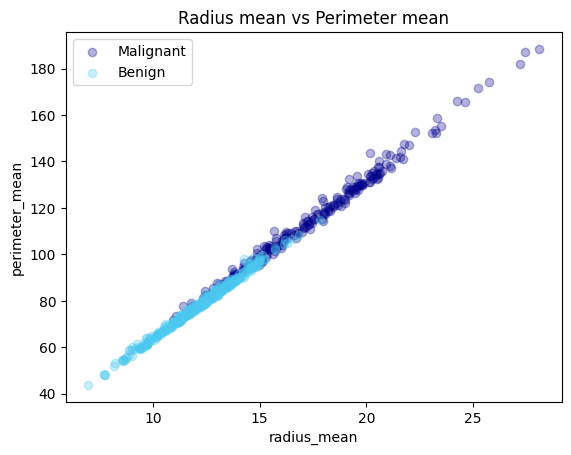

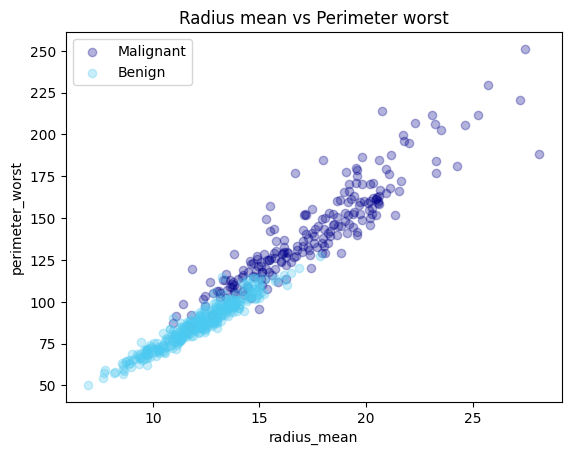

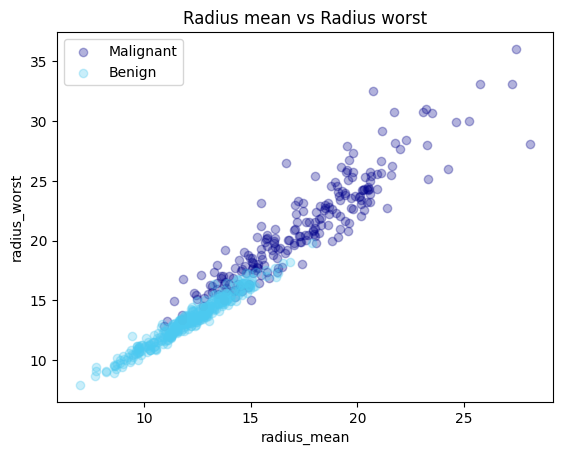

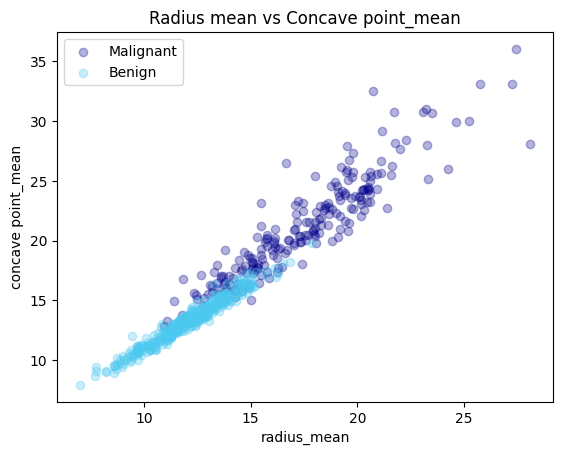

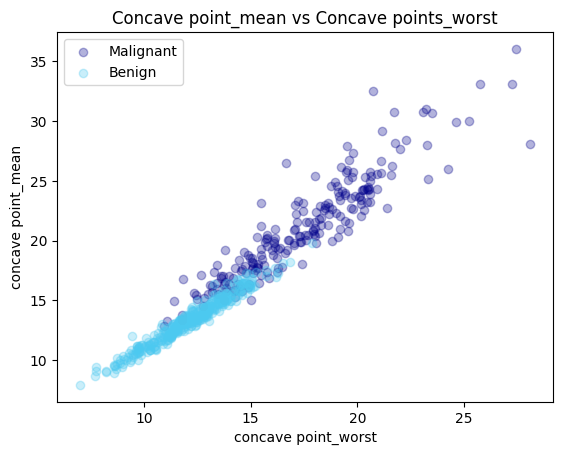

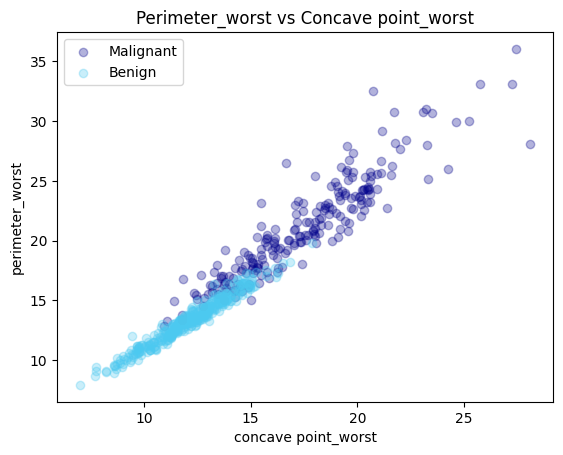

In [ ]:
#More plots of the features selected to visualize data
plt.title("Radius mean vs Perimeter mean")
plt.xlabel("radius_mean")
plt.ylabel("perimeter_mean")
plt.scatter(M.radius_mean, M.perimeter_mean, color = "darkblue", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.perimeter_mean, color = "#4CC9F0", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

plt.title("Radius mean vs Perimeter worst")
plt.xlabel("radius_mean")
plt.ylabel("perimeter_worst")
plt.scatter(M.radius_mean, M.perimeter_worst, color = "darkblue", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.perimeter_worst, color = "#4CC9F0", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

plt.title("Radius mean vs Radius worst")
plt.xlabel("radius_mean")
plt.ylabel("radius_worst")
plt.scatter(M.radius_mean, M.radius_worst, color = "darkblue", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.radius_worst, color = "#4CC9F0", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

plt.title("Radius mean vs Concave point_mean")
plt.xlabel("radius_mean")
plt.ylabel("concave point_mean")
plt.scatter(M.radius_mean, M.radius_worst, color = "darkblue", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.radius_worst, color = "#4CC9F0", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

plt.title("Concave point_mean vs Concave points_worst")
plt.xlabel("concave point_worst")
plt.ylabel("concave point_mean")
plt.scatter(M.radius_mean, M.radius_worst, color = "darkblue", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.radius_worst, color = "#4CC9F0", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

plt.title("Perimeter_worst vs Concave point_worst")
plt.xlabel("concave point_worst")
plt.ylabel("perimeter_worst")
plt.scatter(M.radius_mean, M.radius_worst, color = "darkblue", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.radius_worst, color = "#4CC9F0", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

#Correlation Matrix

##Correlation of all of the features

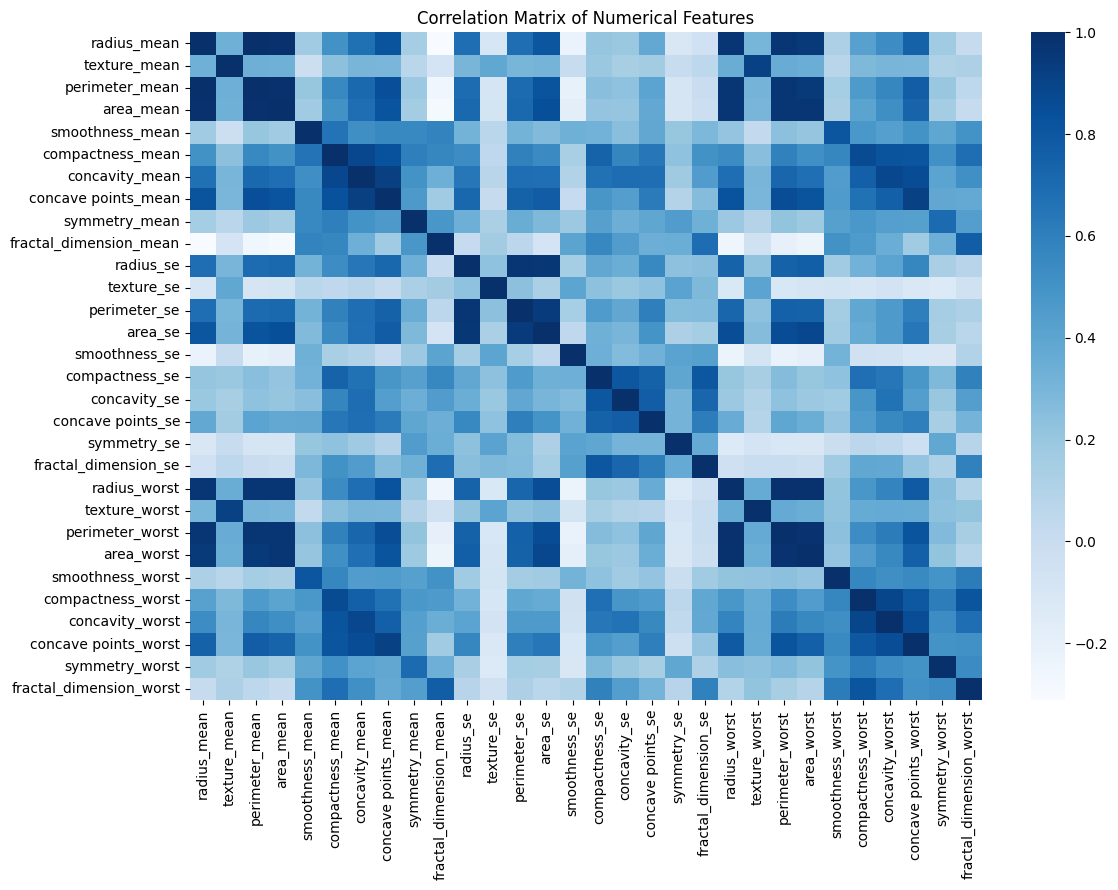

In [ ]:
#Correlation of all of the features
correlation_matrix = df_cap[X.columns].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=False, cmap='Blues')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## Correlation with the target variable


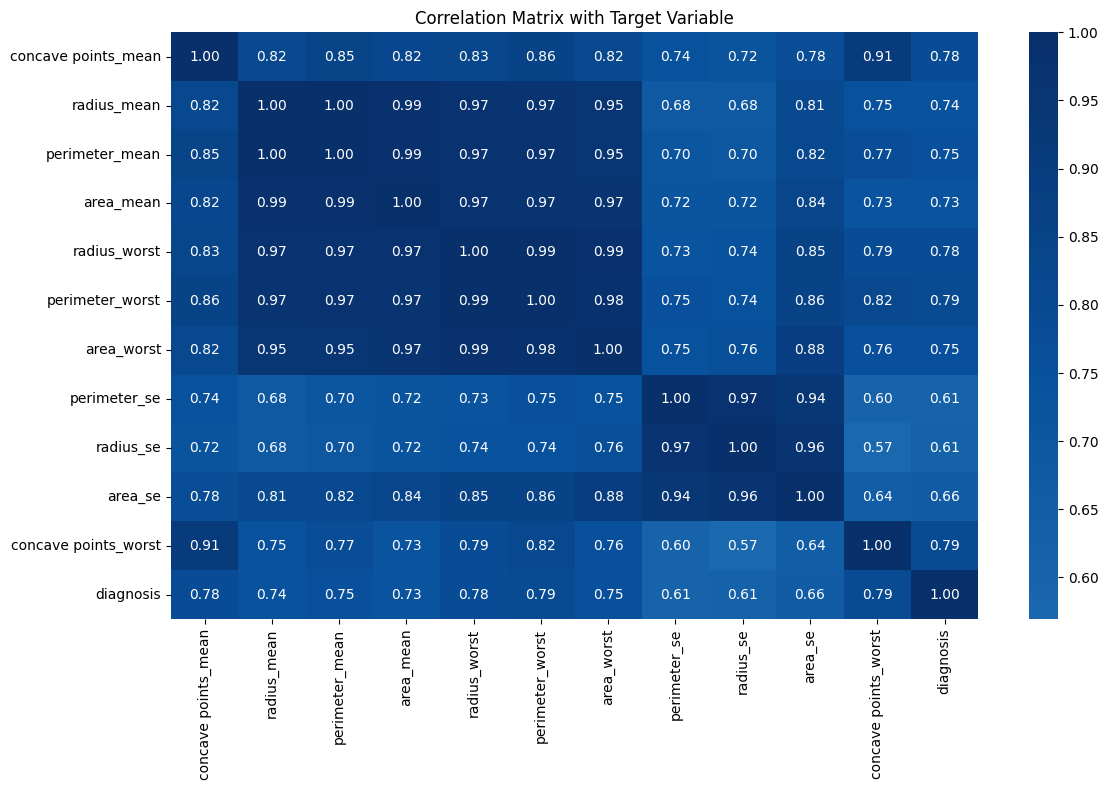

In [ ]:
# Correlation with the target variable
y = df['diagnosis'].values
df_cap['diagnosis'] = np.where(y == 'M', 1, 0)
correlation_matrix = df_cap[features_f + ['diagnosis']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', center=0)
plt.title('Correlation Matrix with Target Variable')
plt.tight_layout()
plt.show()

##Heatmap of the features correlation with percentage

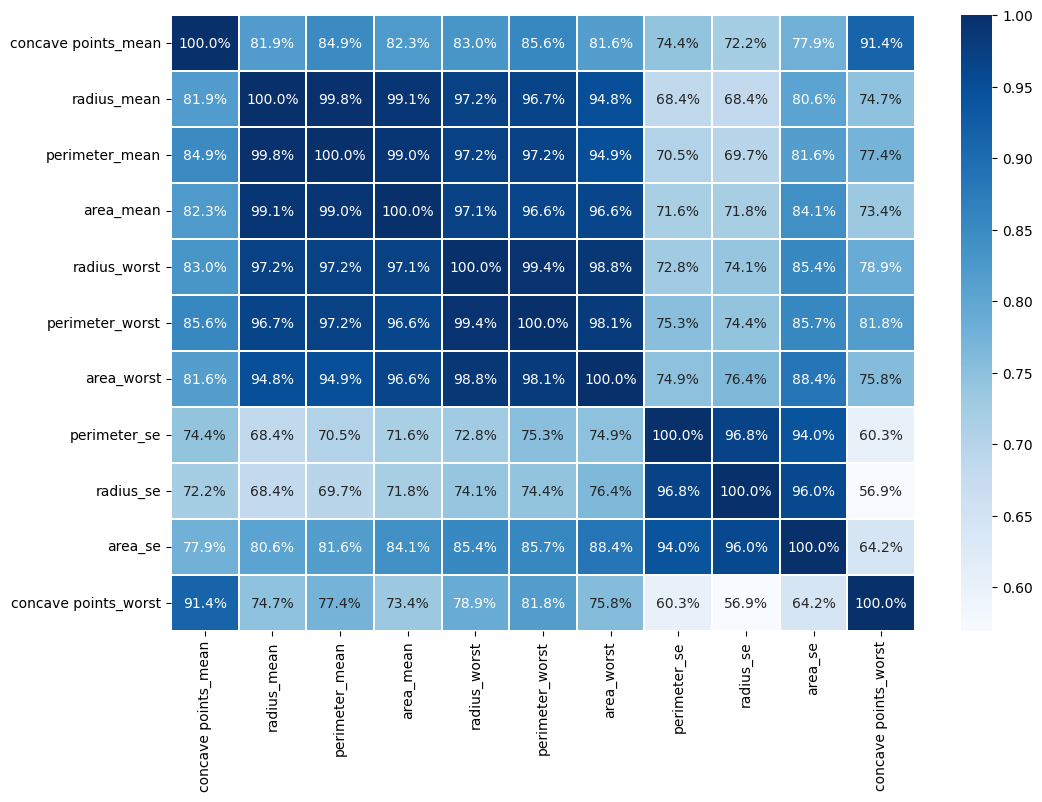

In [ ]:
#Heatmap of the features correlation with percentage
plt.figure(figsize=(12, 8))
cmap =plt.get_cmap('Blues')
sns.heatmap(df_cap[features_f].corr(), annot=True, fmt='.1%',  linewidths=.08, cmap=cmap);

# Models

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt_cap = df_cap_ss.copy()

In [ ]:
dt_cap.head()

,concave points_mean,radius_mean,perimeter_mean,area_mean,radius_worst,perimeter_worst,area_worst,perimeter_se,radius_se,area_se,concave points_worst
0,2.589784,1.127991,1.302472,1.044931,1.921392,2.348102,2.087450,3.273641,2.846293,3.303616,2.309060
1,0.565287,1.878697,1.728058,2.016044,1.839294,1.566081,1.972386,0.324957,0.588679,1.015561,1.094247
2,2.084515,1.622642,1.605860,1.648515,1.540373,1.375123,1.521264,0.999217,1.415993,1.591036,1.966342
3,1.487140,-0.783691,-0.602974,-0.792414,-0.282624,-0.250450,-0.563217,0.351654,0.392596,-0.335869,2.188191
4,1.463455,1.797225,1.820760,1.929391,1.323550,1.366029,1.276525,1.483754,1.463479,1.602863,0.734699


In [ ]:
dt_cap.shape

(569, 11)

In [ ]:
# Target variable
y = df['diagnosis'].values
X_dt = dt_cap

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Accuracy on the test set
accuracy = dtc.score(X_test, y_test)
print(f"Model Accuracy: {accuracy  * 100:.2f}%")
total_accuracy = {}
total_accuracy['Decision Tree (Initial)'] = accuracy

Model Accuracy: 94.74%


In [ ]:
dt=dtc.predict(X_test)

In [ ]:
print(f" Classification report Decision Tree :\n {classification_report(y_test,dt)}")

 Classification report Decision Tree :
               precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
print(f"F1-Score DT : {metrics.f1_score(y_test,dt,pos_label='M') * 100:.2f}%")
print(f"Accuracy DT Test: {metrics.accuracy_score(y_test,dt) * 100:.2f}%")

F1-Score DT : 93.02%
Accuracy DT Test: 94.74%


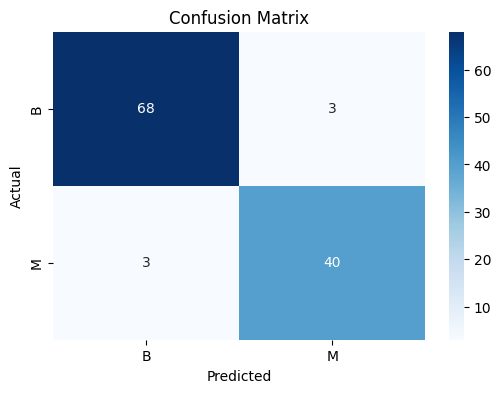

In [ ]:
# Confusion matrix DT
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

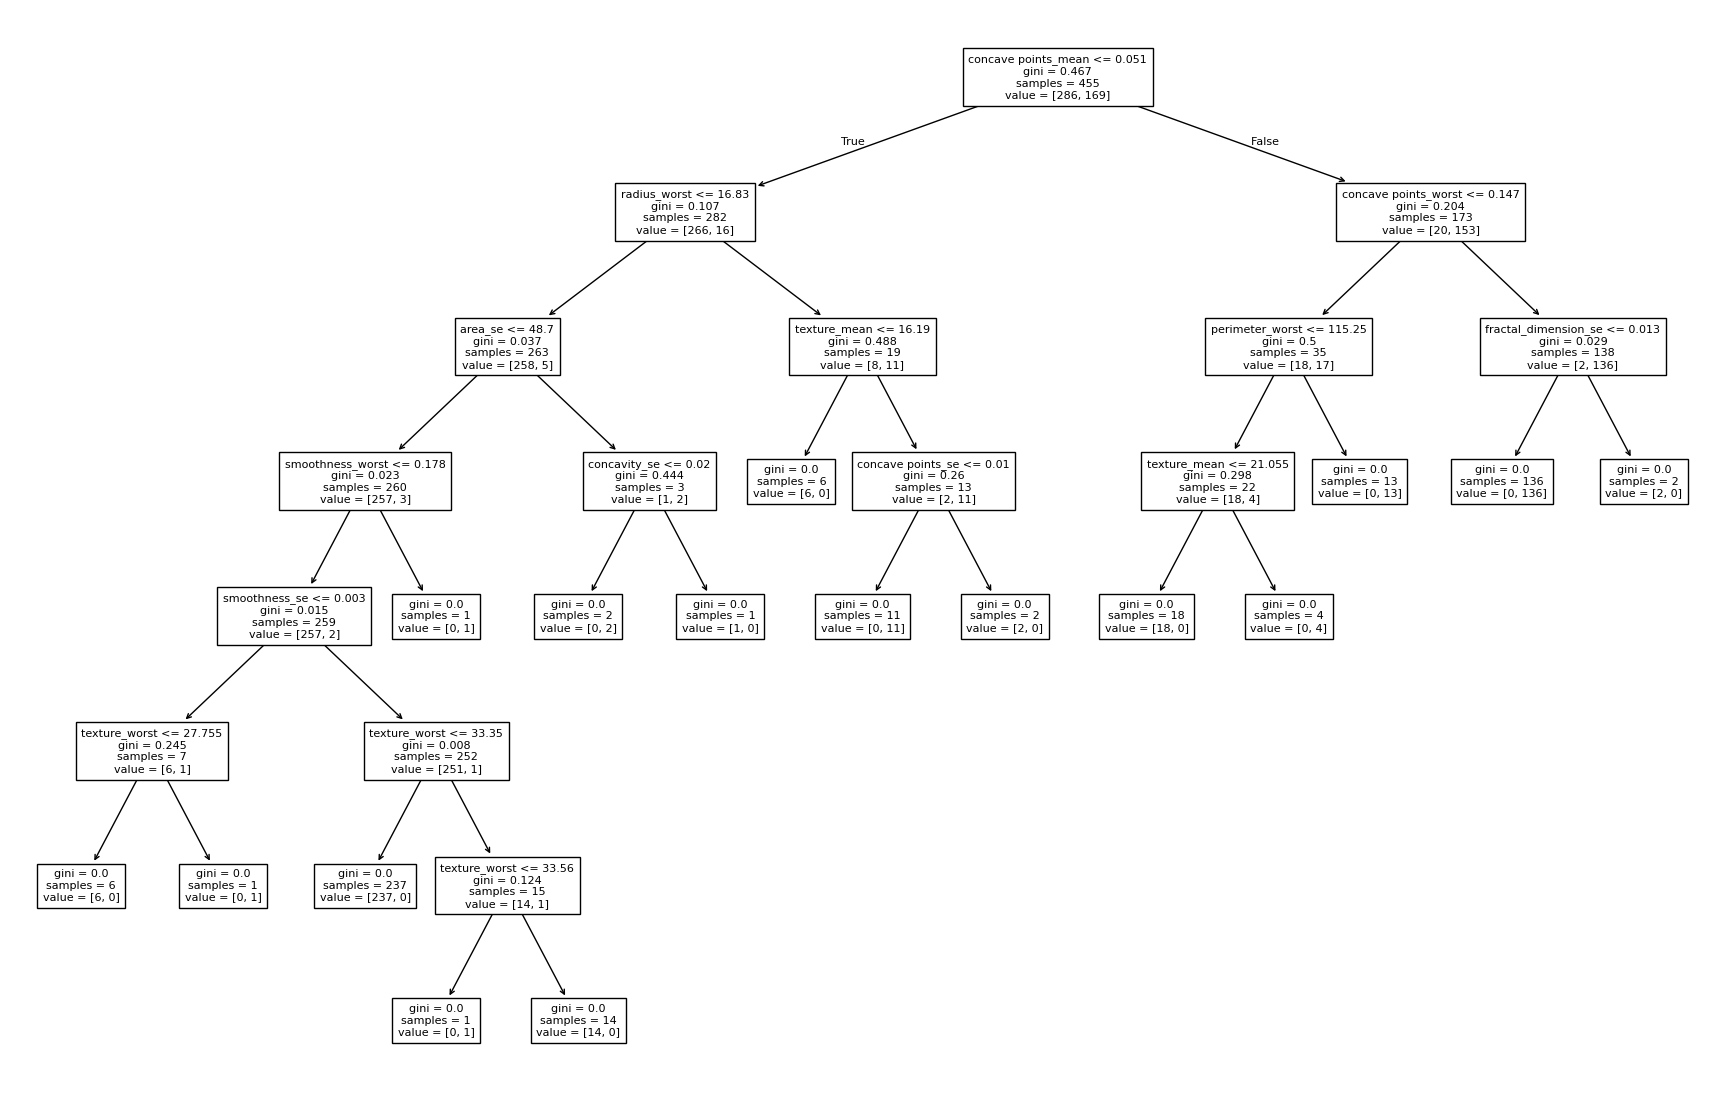

In [ ]:
#Image of the Decision Tree
plt.figure(figsize=(22,14))
plot_tree(dtc, max_depth=7, fontsize=8, feature_names=X.columns);

Tuning

In [ ]:
# Parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Base model
dt_tuned = DecisionTreeClassifier(random_state=42)

In [ ]:
# GridSearchCV
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
best_clf = grid_search.best_estimator_

In [ ]:
# Predict and evaluate
y_pred_t = best_clf.predict(X_test)

In [ ]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(f"Accuracy Initial DT: {accuracy * 100:.2f}%")
print(f"Accuracy DT tuned: {metrics.accuracy_score(y_test, y_pred_t) * 100:.2f}%")

Accuracy Initial DT: 94.74%
Accuracy DT tuned: 96.49%


In [ ]:
print(f" Classification report Decision Tree :\n {classification_report(y_test,y_pred_t)}")

 Classification report Decision Tree :
               precision    recall  f1-score   support

           B       0.95      1.00      0.97        71
           M       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_t)
print("Confusion Matrix DT tuned:\n", cm_dt)

Confusion Matrix DT tuned:
 [[71  0]
 [ 4 39]]


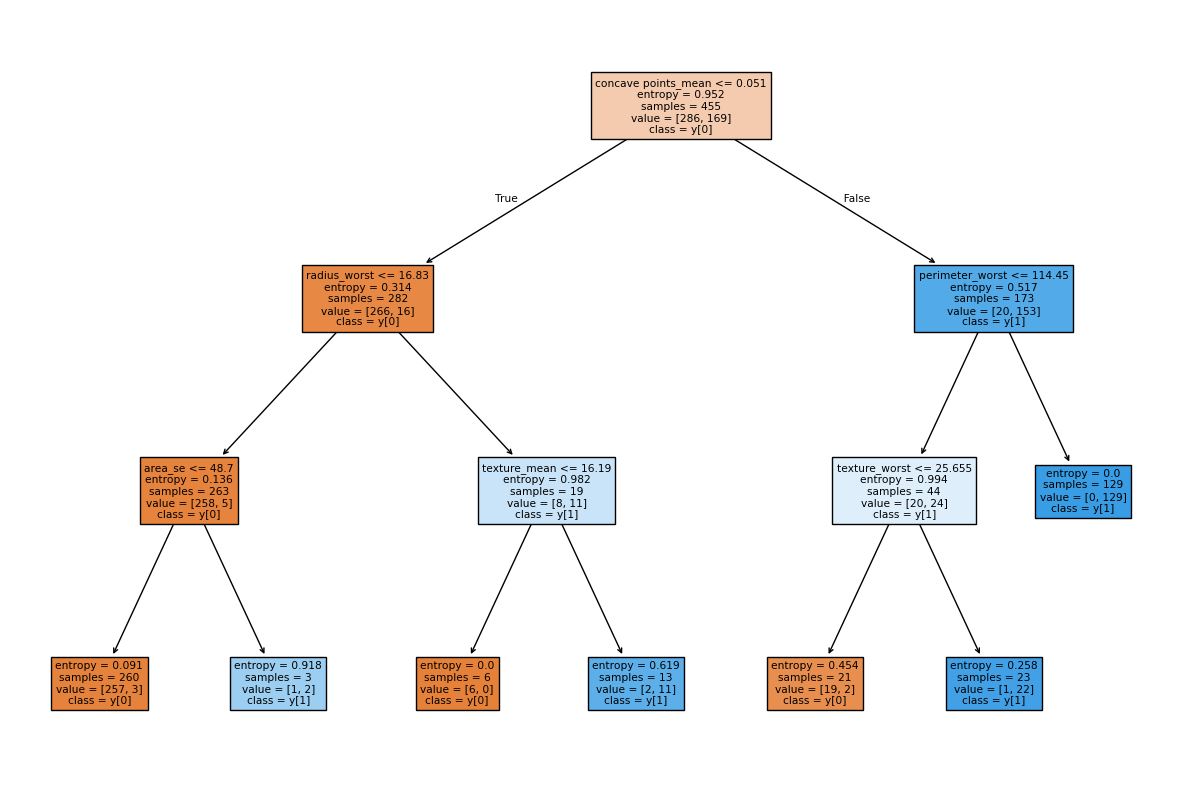

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(best_clf, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()

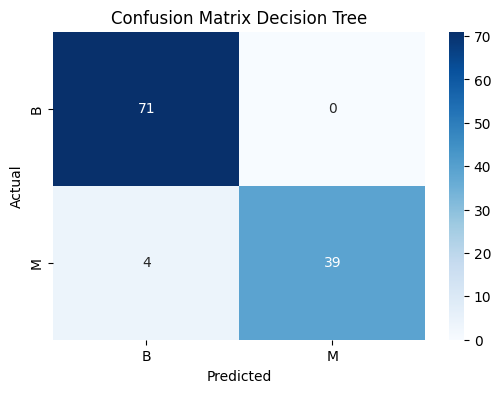

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Decision Tree')
plt.show()

##Random Forest

In [ ]:
rf_cap = df_cap_ss.copy()

In [ ]:
# Definition of target variable
rf_cap['diagnosis'] = y
y = rf_cap['diagnosis'].values
X = rf_cap.drop('diagnosis', axis=1)

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Random forest clasifier
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Train mode
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predictions = rf.predict(X=X_test)
precision = accuracy_score(predictions, y_test)

print(predictions)

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M']


In [ ]:
# Accuracy of the model

print(f'Accuracy Random Forest:{precision:.2%}  ')

Accuracy Random Forest:95.61%  


In [ ]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, predictions)
print("Confusion Matrix Random Forest:\n", cm)

# Classification Report
cr = classification_report(y_test, predictions)
print("\nClassification Random Forest:\n", cr)

# Accuracy Score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy Decision Random Forest:{precision:.2%}  ')

Confusion Matrix Random Forest:
 [[68  3]
 [ 3 40]]

Classification Random Forest:
               precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy Decision Random Forest:95.61%  


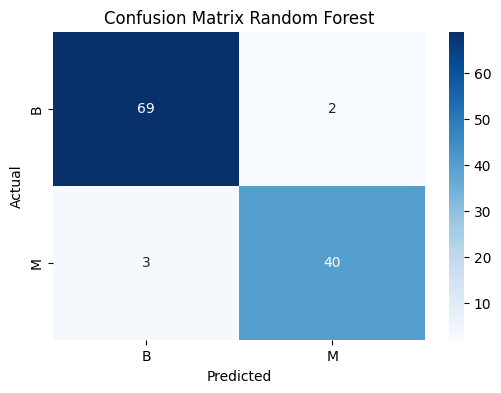

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Random Forest')
plt.show()

Tuning

In [ ]:
rf_tuned = df_cap_ss.copy()

In [ ]:
# Definition of target variable
rf_tuned['diagnosis'] = y
y = rf_tuned['diagnosis'].values
X = rf_tuned.drop('diagnosis', axis=1)

In [ ]:
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(max_depth=20, min_samples_split=5)


In [ ]:
model_grid = RandomForestClassifier(bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200,random_state=42)
model_grid.fit(X_train, y_train)
y_pred_grid = model_grid.predict(X_test)
print(classification_report(y_test, y_pred_grid))
print(f'Accuracy Random Forest:{accuracy:.2%}  ')

              precision    recall  f1-score   support

           B       0.96      0.98      0.97       108
           M       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy Random Forest:95.61%  


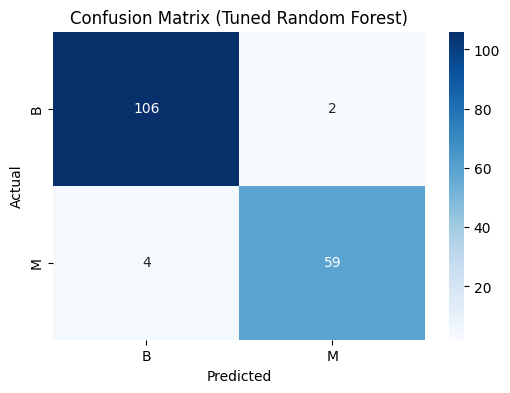

In [ ]:
plt.figure(figsize=(6,4))
cm_tuned_rf = confusion_matrix(y_test, y_pred_grid)
sns.heatmap(cm_tuned_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.show()

##Logistic Regression

In [ ]:
lr = df_cap_ss.copy()

In [ ]:
lr['diagnosis'] = y
y = lr['diagnosis'].values
X = lr.drop('diagnosis', axis=1)

In [ ]:
lr.head()

,concave points_mean,radius_mean,perimeter_mean,area_mean,radius_worst,perimeter_worst,area_worst,perimeter_se,radius_se,area_se,concave points_worst,diagnosis
0,2.589784,1.127991,1.302472,1.044931,1.921392,2.348102,2.087450,3.273641,2.846293,3.303616,2.309060,M
1,0.565287,1.878697,1.728058,2.016044,1.839294,1.566081,1.972386,0.324957,0.588679,1.015561,1.094247,M
2,2.084515,1.622642,1.605860,1.648515,1.540373,1.375123,1.521264,0.999217,1.415993,1.591036,1.966342,M
3,1.487140,-0.783691,-0.602974,-0.792414,-0.282624,-0.250450,-0.563217,0.351654,0.392596,-0.335869,2.188191,M
4,1.463455,1.797225,1.820760,1.929391,1.323550,1.366029,1.276525,1.483754,1.463479,1.602863,0.734699,M


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print ("Accuracy Logistic Regression Test: {:.2f}%".format(model.score(X_test, y_test)*100))

Accuracy Logistic Regression Test: 98.25%


In [ ]:
y_pred = model.predict(X_test)
print("Classification Report for Logistic Regression Model:")
print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        71
           M       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



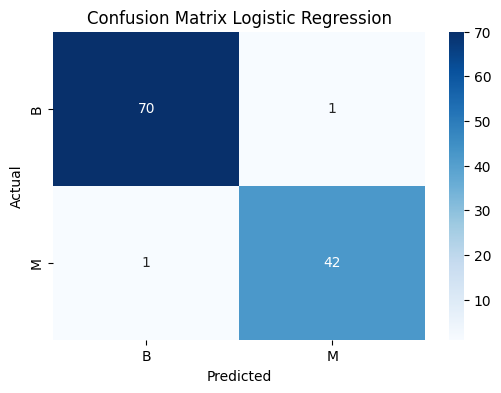

In [ ]:
plt.figure(figsize=(6,4))
cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

Tuning

In [ ]:
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
]

In [ ]:
log_model = LogisticRegression()
clf_lr = GridSearchCV(log_model,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
clf_lr

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [ ]:
best_estimator = clf_lr.fit(X_train, y_train)
y_pred_lr = best_estimator.predict(X_test)
print("Classification Report for Best Logistic Regression Model:")
print(classification_report(y_test, y_pred_lr))

print(f"Accuracy Logistic Regression Tuned: {accuracy_score(y_test, y_pred_lr):.2f}%")

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
Classification Report for Best Logistic Regression Model:
              precision    recall  f1-score   support

           B       0.99      1.00      0.99        71
           M       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Accuracy Logistic Regression Tuned: 0.99%


In [ ]:
print(f"Accuracy Logistic Regression Tuned: {accuracy_score(y_test, y_pred_lr)*100:.4f}%")

Accuracy Logistic Regression Tuned: 99.1228%


In [ ]:
cm_lr_t = metrics.confusion_matrix(y_test, y_pred_lr)
print(cm_lr_t)

[[71  0]
 [ 1 42]]


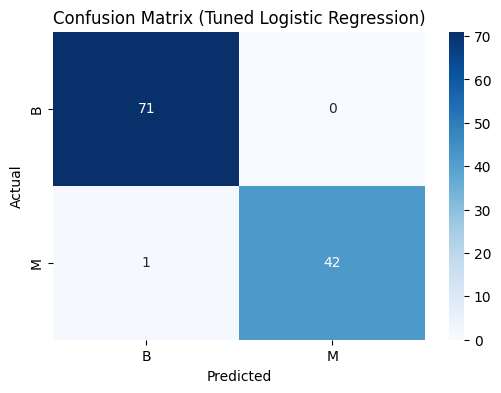

In [ ]:
plt.figure(figsize=(6,4))
cm = cm_lr_t
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Tuned Logistic Regression)')
plt.show()

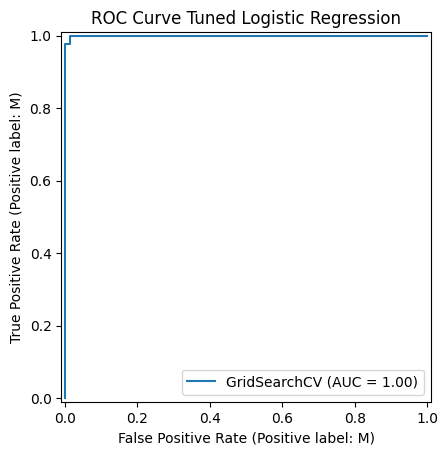

In [ ]:
# Probabilities for class ('M')
y_pred_proba_lr_tuned = best_estimator.predict_proba(X_test)[:, 1]

roc_display = RocCurveDisplay.from_estimator(best_estimator, X_test, y_test, pos_label='M')

plt.title('ROC Curve Tuned Logistic Regression')
plt.show()

## SVM

In [ ]:
svm_d = df_cap_ss.copy()

In [ ]:
#Droping target variable and id of the dataset
svm_d['diagnosis'] = y
y = svm_d['diagnosis'].values
X = svm_d.drop('diagnosis', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 11), (114, 11), (455,), (114,))

In [ ]:
model = SVC(probability=True)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
train_predictions = model.predict(X_train)
accuracy_train = accuracy_score(y_train, train_predictions)
print(f"Accuracy of the Train SVM model: {accuracy_train:.4%}")

Accuracy of the Train SVM model: 94.9451%


In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of test SVM model: {accuracy:.4%}")

Accuracy of test SVM model: 96.4912%


In [ ]:
cm_svm = metrics.confusion_matrix(y_test, predictions)
print(cm_svm)

[[70  1]
 [ 3 40]]


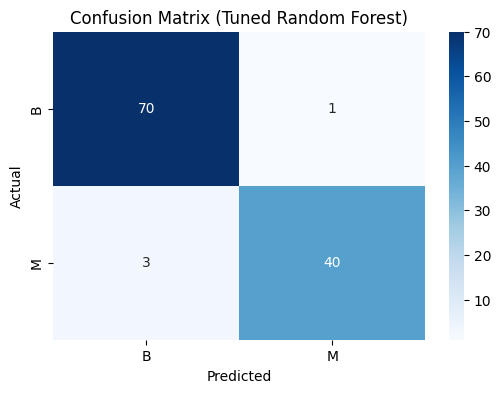

In [ ]:
plt.figure(figsize=(6,4))
cm = cm_svm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (SVM)')
plt.show()

Tuning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [ ]:
svm_model = SVC(probability=True)


In [ ]:
grid_svm = {'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly']}

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(svm_model, param_grid=param_grid, cv=skf, verbose=1)

grid = GridSearchCV(svm_model,param_grid = grid_svm, cv = 3, verbose=True)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=True)

In [ ]:
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01, probability=True)


In [ ]:
svm = SVC(kernel='rbf', C=100, gamma=0.1,  probability=True, random_state=42)

In [ ]:
best_svm = grid.best_estimator_

In [ ]:
y_pred_svm = best_svm.predict(X_test)

# Print classification report
print("Classification Report for Tuned SVM:")
print(classification_report(y_test, y_pred_svm))

Classification Report for Tuned SVM:
              precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
print("Train Accuracy SVM FT:", best_svm.score(X_train, y_train))
print("Test Accuracy SVM FT:", best_svm.score(X_test, y_test))

Train Accuracy SVM FT: 0.9623115577889447
Test Accuracy SVM FT: 0.9707602339181286


In [ ]:
cm_svm_ft = metrics.confusion_matrix(y_test, y_pred_svm)
print(cm_svm_ft)

[[106   2]
 [  3  60]]


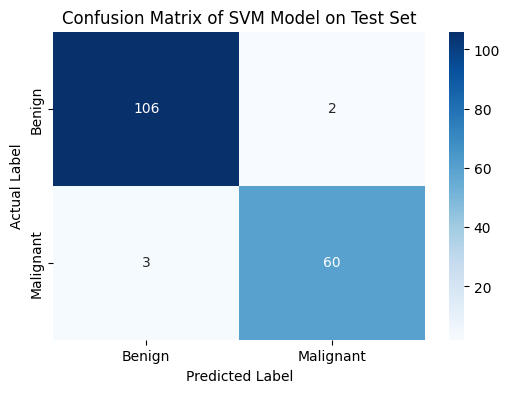

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm_ft, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of SVM Model Tuned')
plt.show()